# Exploratory Data Analysis (EDA) & Preprocessing
### For both "train2023.csv" and "test2023.csv" respectively
1. Understanding Data
     - 1.1. Descriptive Statistics for Numeric Columns
2. Examining Variables
     - 2.1. Numerical Variables
          - 2.1.1. Discrete Variables and Continous Variables
               - 2.1.1.1. Discrete Variables
               - 2.1.1.2. Continuous Variables 
     - 2.2. Categorical Variables
3. Handling Missing Values 
     - 3.1. Normalizing Continuous Numerical Variables That Are Not Normally Distributed
4. Handling Outliers
5. Encoding Categorical Variables
6. Exploring Distribution Situations (Skewness & Kurtosis)

# Classification Algorithms (ML)


In [1]:
## Data Analysis Phase
## Understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import missingno as msno
import warnings
from sklearn import preprocessing 
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew, kurtosis, boxcox
from scipy.special import boxcox1p, inv_boxcox
from scipy.stats.mstats import winsorize

# To ignore warnings
warnings.filterwarnings('ignore')

# Set options to display all columns and rows without truncation
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

# EDA & Preprocessing for "train2023.csv"

## 1. Understanding Data

In [2]:
# Read the df from the "hmeq.csv" file using Pandas and store it in the 'df' dataset
df_train = pd.read_csv("train2023.csv")

# Make a copy of the DataFrame
df = df_train.copy()

# Print the shape of the df, which represents the number of rows and columns
print(df.shape)

(4768, 14)


In [3]:
df.head()

,index,DEBTINC,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD
0,0,34.521450,40000,134029.0,191990.0,DebtCon,Mgr,NaN,1.0,0.0,178.780960,0.0,24.0,0
1,1,34.357866,25500,113204.0,184561.0,DebtCon,Sales,17.0,1.0,0.0,308.958198,1.0,31.0,0
2,2,25.623639,26000,20119.0,54563.0,DebtCon,Other,24.0,0.0,0.0,126.987959,0.0,11.0,0
3,3,38.217726,8700,77377.0,97070.0,DebtCon,Mgr,3.0,0.0,0.0,68.854877,2.0,24.0,0
4,4,41.538051,15800,51281.0,144202.0,DebtCon,Other,1.0,0.0,0.0,285.997898,4.0,43.0,0


Largely empty rows were deleted.

In [4]:
# Set a threshold percentage for non-null values
threshold_percentage = 50  

# Calculate the threshold based on the percentage and the number of columns
threshold = len(df.columns) * (threshold_percentage / 100)

# Drop rows with less than the calculated threshold number of non-null values
df = df.dropna(thresh=threshold)

# Print the new DataFrame
print("\nNew DataFrame:")
df.head()


New DataFrame:


,index,DEBTINC,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD
0,0,34.521450,40000,134029.0,191990.0,DebtCon,Mgr,NaN,1.0,0.0,178.780960,0.0,24.0,0
1,1,34.357866,25500,113204.0,184561.0,DebtCon,Sales,17.0,1.0,0.0,308.958198,1.0,31.0,0
2,2,25.623639,26000,20119.0,54563.0,DebtCon,Other,24.0,0.0,0.0,126.987959,0.0,11.0,0
3,3,38.217726,8700,77377.0,97070.0,DebtCon,Mgr,3.0,0.0,0.0,68.854877,2.0,24.0,0
4,4,41.538051,15800,51281.0,144202.0,DebtCon,Other,1.0,0.0,0.0,285.997898,4.0,43.0,0


In [5]:
print(df.shape)

(4690, 14)


78 rows were deleted.

In [6]:
# Print the number of unique values for each column
print('Unique column values')
df.apply(lambda x: len(x.unique())).sort_values(ascending=False)


Unique column values


index      4690
CLAGE      4289
VALUE      4269
MORTDUE    4043
DEBTINC    3681
LOAN        507
YOJ          91
CLNO         63
NINQ         17
DELINQ       14
DEROG        12
JOB           7
REASON        3
BAD           2
dtype: int64

The only column with unique values is the 'index' column.

In [7]:
# Drop the column named "index" from the DataFrame "df" along the columns (axis=1)
# The "inplace=True" parameter ensures that the changes are made directly to the original DataFrame, 
# and the modified DataFrame is displayed using the "head()" method.
df.drop("index", axis=1, inplace=True)
df.head()

,DEBTINC,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD
0,34.521450,40000,134029.0,191990.0,DebtCon,Mgr,NaN,1.0,0.0,178.780960,0.0,24.0,0
1,34.357866,25500,113204.0,184561.0,DebtCon,Sales,17.0,1.0,0.0,308.958198,1.0,31.0,0
2,25.623639,26000,20119.0,54563.0,DebtCon,Other,24.0,0.0,0.0,126.987959,0.0,11.0,0
3,38.217726,8700,77377.0,97070.0,DebtCon,Mgr,3.0,0.0,0.0,68.854877,2.0,24.0,0
4,41.538051,15800,51281.0,144202.0,DebtCon,Other,1.0,0.0,0.0,285.997898,4.0,43.0,0


In [8]:
# Display concise information about the DataFrame "df"
# This includes data types, non-null counts, and memory usage information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4690 entries, 0 to 4767
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DEBTINC  3680 non-null   float64
 1   LOAN     4690 non-null   int64  
 2   MORTDUE  4333 non-null   float64
 3   VALUE    4613 non-null   float64
 4   REASON   4558 non-null   object 
 5   JOB      4547 non-null   object 
 6   YOJ      4354 non-null   float64
 7   DEROG    4193 non-null   float64
 8   DELINQ   4300 non-null   float64
 9   CLAGE    4531 non-null   float64
 10  NINQ     4352 non-null   float64
 11  CLNO     4592 non-null   float64
 12  BAD      4690 non-null   int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 513.0+ KB


### 1.1. Descriptive Statistics for Numeric Columns

In [9]:
# Generate descriptive statistics for numeric columns in the DataFrame "df"
# Transpose the result for a more readable format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DEBTINC,3680.0,33.967442,8.084784,0.720295,29.321191,34.933880,39.108201,144.189001
LOAN,4690.0,18694.179104,11178.841742,1300.000000,11200.000000,16400.000000,23500.000000,89900.000000
MORTDUE,4333.0,74424.738112,44255.820104,2063.000000,46910.000000,65994.000000,92853.000000,399412.000000
VALUE,4613.0,103194.548567,58794.088676,8800.000000,66569.000000,90000.000000,121796.000000,855909.000000
YOJ,4354.0,8.866054,7.534557,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,4193.0,0.254472,0.867605,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,4300.0,0.458140,1.124849,0.000000,0.000000,0.000000,0.000000,13.000000
CLAGE,4531.0,179.442286,85.609878,0.000000,115.543501,172.799301,230.711163,1168.233561
NINQ,4352.0,1.181756,1.733127,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,4592.0,21.391551,10.119090,0.000000,15.000000,20.000000,26.000000,71.000000



- The average loan amount for applicants is $18,694.
- The variables LOAN, MORTDUE, and VALUE exhibit wide-ranging values, suggesting a diverse financial status among applicants. The minimal value and first quartile are closely aligned, with a mean larger than the median, indicating a right-skewed distribution.
- A significant portion (at least 50%) of applicants have maintained a stable employment history of 7 years, reflecting a reliable income. The Years on Job (YOJ) variable also displays a positive skew.
- DEROG and DELINQ demonstrate a right-skewed distribution, indicating that a substantial majority (at least 75%) of applicants have no negative credit reports.
- CLAGE reveals a varied credit line history, underscoring the diverse credit and financial backgrounds of the applicants.
While most applicants hold 1 credit card and 21 credit lines, some extreme values exist, with a maximum of 17 cards and 71 lines.
- DEBTINC exhibits a wide range of Debt-to-Income ratios, indicating varying levels of financial leverage among the applicants.

## 2. Examining Variables

All data were examined with their explanations from the data description file (HMEQ.rtf).

### 2.1. Numerical Variables

In [10]:
# Create a list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

# Print the number of numerical variables
print('Number of numerical variables: ', len(numerical_features))

# Visualize the first few rows of the numerical variables in the DataFrame
df[numerical_features].head()

Number of numerical variables:  11


,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD
0,34.521450,40000,134029.0,191990.0,NaN,1.0,0.0,178.780960,0.0,24.0,0
1,34.357866,25500,113204.0,184561.0,17.0,1.0,0.0,308.958198,1.0,31.0,0
2,25.623639,26000,20119.0,54563.0,24.0,0.0,0.0,126.987959,0.0,11.0,0
3,38.217726,8700,77377.0,97070.0,3.0,0.0,0.0,68.854877,2.0,24.0,0
4,41.538051,15800,51281.0,144202.0,1.0,0.0,0.0,285.997898,4.0,43.0,0


### 2.1.1. Discrete Variables and Continous Variables

##### 2.1.1.1. Discrete Variables

In [11]:
# Identify discrete numerical variables with fewer than 25 unique values
discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) < 25]

# Print the count of discrete variables
print("Discrete Variables Count: {}".format(len(discrete_features)))

Discrete Variables Count: 4


In [12]:
discrete_features

['DEROG', 'DELINQ', 'NINQ', 'BAD']

In [13]:
df[discrete_features].head()

,DEROG,DELINQ,NINQ,BAD
0,1.0,0.0,0.0,0
1,1.0,0.0,1.0,0
2,0.0,0.0,0.0,0
3,0.0,0.0,2.0,0
4,0.0,0.0,4.0,0


In [14]:
# Print unique values for each numerical feature to understand whether they are discrete or continuous
[print(feature, len(df[feature].unique())) for feature in numerical_features]

DEBTINC 3681
LOAN 507
MORTDUE 4043
VALUE 4269
YOJ 91
DEROG 12
DELINQ 14
CLAGE 4289
NINQ 17
CLNO 63
BAD 2


[None, None, None, None, None, None, None, None, None, None, None]

In [15]:
# Print 0 values, null values, and unique values for each numerical feature
for feature in numerical_features:
    zero_values = (df[feature] == 0).sum()
    null_values = df[feature].isnull().sum()
    unique_values = len(df[feature].unique())
    
    print(f"Feature: {feature}")
    print(f"Number of 0 Values: {zero_values}")
    print(f"Number of Null Values: {null_values}")
    print(f"Unique Values: {unique_values}")
    print("*"*30)

Feature: DEBTINC
Number of 0 Values: 0
Number of Null Values: 1010
Unique Values: 3681
******************************
Feature: LOAN
Number of 0 Values: 0
Number of Null Values: 0
Unique Values: 507
******************************
Feature: MORTDUE
Number of 0 Values: 0
Number of Null Values: 357
Unique Values: 4043
******************************
Feature: VALUE
Number of 0 Values: 0
Number of Null Values: 77
Unique Values: 4269
******************************
Feature: YOJ
Number of 0 Values: 334
Number of Null Values: 336
Unique Values: 91
******************************
Feature: DEROG
Number of 0 Values: 3626
Number of Null Values: 497
Unique Values: 12
******************************
Feature: DELINQ
Number of 0 Values: 3309
Number of Null Values: 390
Unique Values: 14
******************************
Feature: CLAGE
Number of 0 Values: 1
Number of Null Values: 159
Unique Values: 4289
******************************
Feature: NINQ
Number of 0 Values: 2036
Number of Null Values: 338
Unique Values

Since the meaning of "CLNO" column is 'Number of Credit Lines', it is a discrete variable. Therefore it has been added to the list of discrete variables.

In [16]:
discrete_features.append("CLNO")

In [17]:
# Printing the updated list of discrete_features_t
discrete_features

['DEROG', 'DELINQ', 'NINQ', 'BAD', 'CLNO']

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4690 entries, 0 to 4767
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DEBTINC  3680 non-null   float64
 1   LOAN     4690 non-null   int64  
 2   MORTDUE  4333 non-null   float64
 3   VALUE    4613 non-null   float64
 4   REASON   4558 non-null   object 
 5   JOB      4547 non-null   object 
 6   YOJ      4354 non-null   float64
 7   DEROG    4193 non-null   float64
 8   DELINQ   4300 non-null   float64
 9   CLAGE    4531 non-null   float64
 10  NINQ     4352 non-null   float64
 11  CLNO     4592 non-null   float64
 12  BAD      4690 non-null   int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 513.0+ KB


In [19]:
print('Number of discrete numerical variables: ', len(discrete_features))

Number of discrete numerical variables:  5


In [20]:
# Display the df for the features in discrete_features
df[discrete_features].head()

,DEROG,DELINQ,NINQ,BAD,CLNO
0,1.0,0.0,0.0,0,24.0
1,1.0,0.0,1.0,0,31.0
2,0.0,0.0,0.0,0,11.0
3,0.0,0.0,2.0,0,24.0
4,0.0,0.0,4.0,0,43.0


##### 2.1.2.2. Continuous Variables

In [21]:
# Identify continuous numerical features by excluding discrete, year-related, and 'index' variables
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]

# Print the count of continuous features in train dataset
print("Continuous Feature Count (in the train dataset): {}".format(len(continuous_features)))

Continuous Feature Count (in the train dataset): 6


In [22]:
continuous_features

['DEBTINC', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLAGE']

### 2.2. Categorical Variables

In [23]:
# Identify categorical features in the df
categorical_features = [feature for feature in df.columns if df[feature].dtypes == "O"]

# Print the count of categorical features
print("Categorical Feature Count (in the train dataset): {}".format(len(categorical_features)))

Categorical Feature Count (in the train dataset): 2


In [24]:
# Display the list of categorical features in dataset
categorical_features

['REASON', 'JOB']

In [25]:
df[categorical_features].head()

,REASON,JOB
0,DebtCon,Mgr
1,DebtCon,Sales
2,DebtCon,Other
3,DebtCon,Mgr
4,DebtCon,Other


In [26]:
# Print the number of unique categories for each categorical feature 
for feature in categorical_features:
    print("Number of unique categories in variable '{}': {}".format(feature, len(df[feature].unique())))

Number of unique categories in variable 'REASON': 3
Number of unique categories in variable 'JOB': 7


## 3. Handling Missing Values

In [27]:
# Check the percentage of NaN values present in each feature
# Create a list of features with missing values
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum() > 1]

# Print the feature name and the percentage of missing values
for feature in features_with_na:
    print("{}: {}% missing values".format(feature, np.round(df[feature].isnull().mean() * 100, 4)))

DEBTINC: 21.5352% missing values
MORTDUE: 7.6119% missing values
VALUE: 1.6418% missing values
REASON: 2.8145% missing values
JOB: 3.049% missing values
YOJ: 7.1642% missing values
DEROG: 10.597% missing values
DELINQ: 8.3156% missing values
CLAGE: 3.3902% missing values
NINQ: 7.2068% missing values
CLNO: 2.0896% missing values


In [28]:
# Display information about missing values, missing value percentages, and unique values
def missing_data(dataset, n):
    # Count the missing values in each column, sort in descending order
    missing_values = dataset.isnull().sum().sort_values(ascending=False)

    # Calculate the percentage of missing values for each column, sort in descending order
    missing_percentage = (dataset.isnull().sum() / dataset.isnull().count()).sort_values(ascending=False) * 100

    # Count the number of unique values in each column
    unique_values = dataset.nunique()

    # Create a DataFrame combining the above information
    missing_data_info = pd.concat([missing_values, missing_percentage, unique_values], axis=1, 
                                  keys=["Missing Values", "Missing Values Percentage", "Unique Values"], sort=False)
    
    # Display the first 'n' rows of the combined information
    print(missing_data_info.head(n))


In [29]:
# Display information about missing values, missing value percentages, and unique values for each column
missing_data(df, 20)

         Missing Values  Missing Values Percentage  Unique Values
DEBTINC            1010                  21.535181           3680
DEROG               497                  10.597015             11
DELINQ              390                   8.315565             13
MORTDUE             357                   7.611940           4042
NINQ                338                   7.206823             16
YOJ                 336                   7.164179             90
CLAGE               159                   3.390192           4288
JOB                 143                   3.049041              6
REASON              132                   2.814499              2
CLNO                 98                   2.089552             62
VALUE                77                   1.641791           4268
LOAN                  0                   0.000000            507
BAD                   0                   0.000000              2


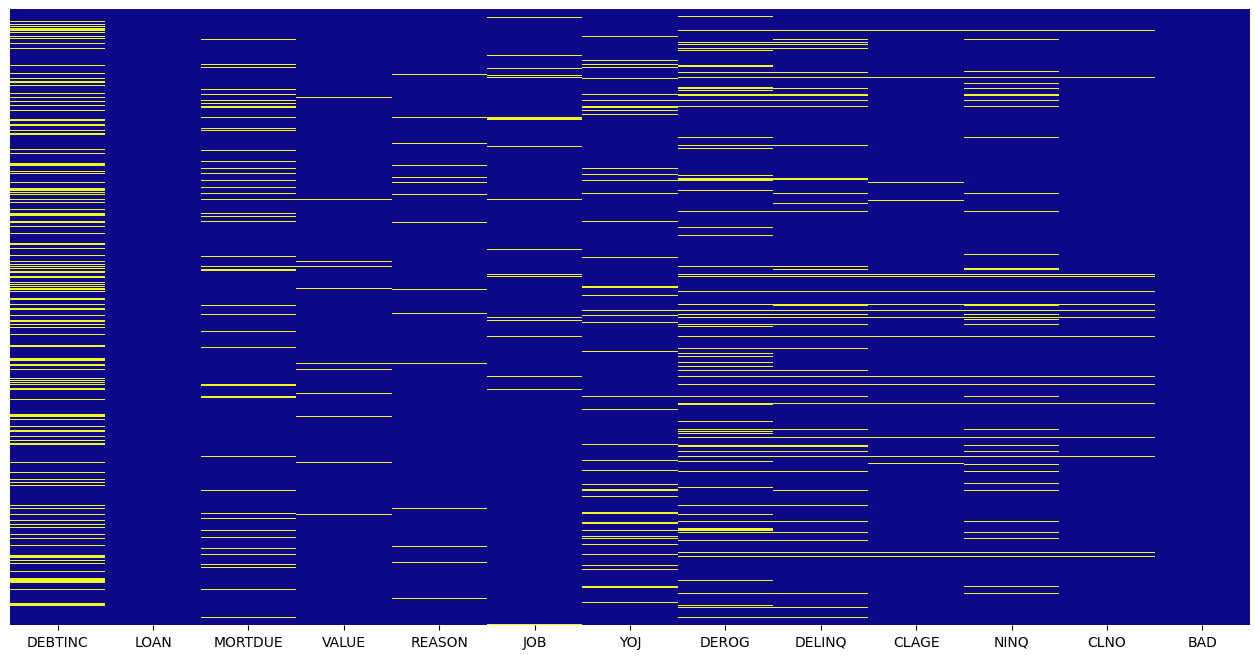

In [30]:
# Set the figure size for the heatmap
mpl.rcParams["figure.figsize"] = (16, 8)

# Create a heatmap to visually represent missing values in the DataFrame "df"
# Yellow lines indicate missing values (True in the heatmap), while non-missing values are represented in blue
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="plasma");


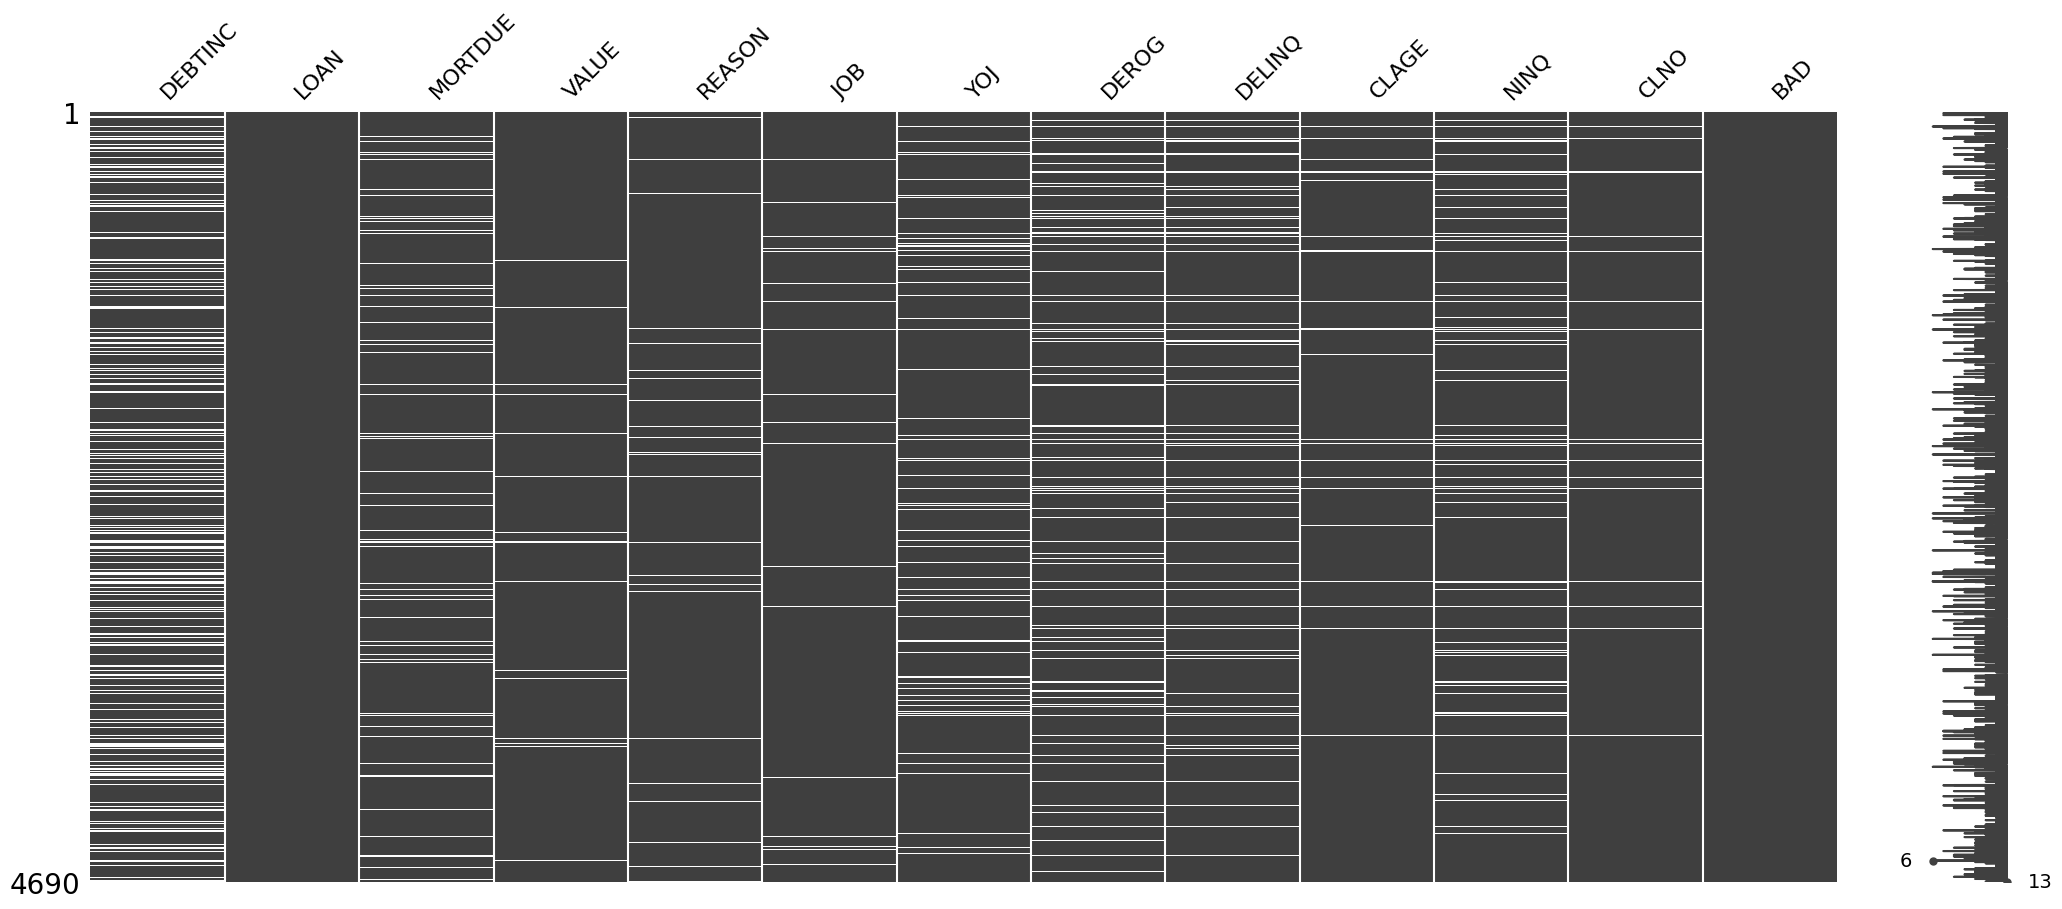

In [31]:
# Another way to observe missing values via matrix 
msno.matrix(df);

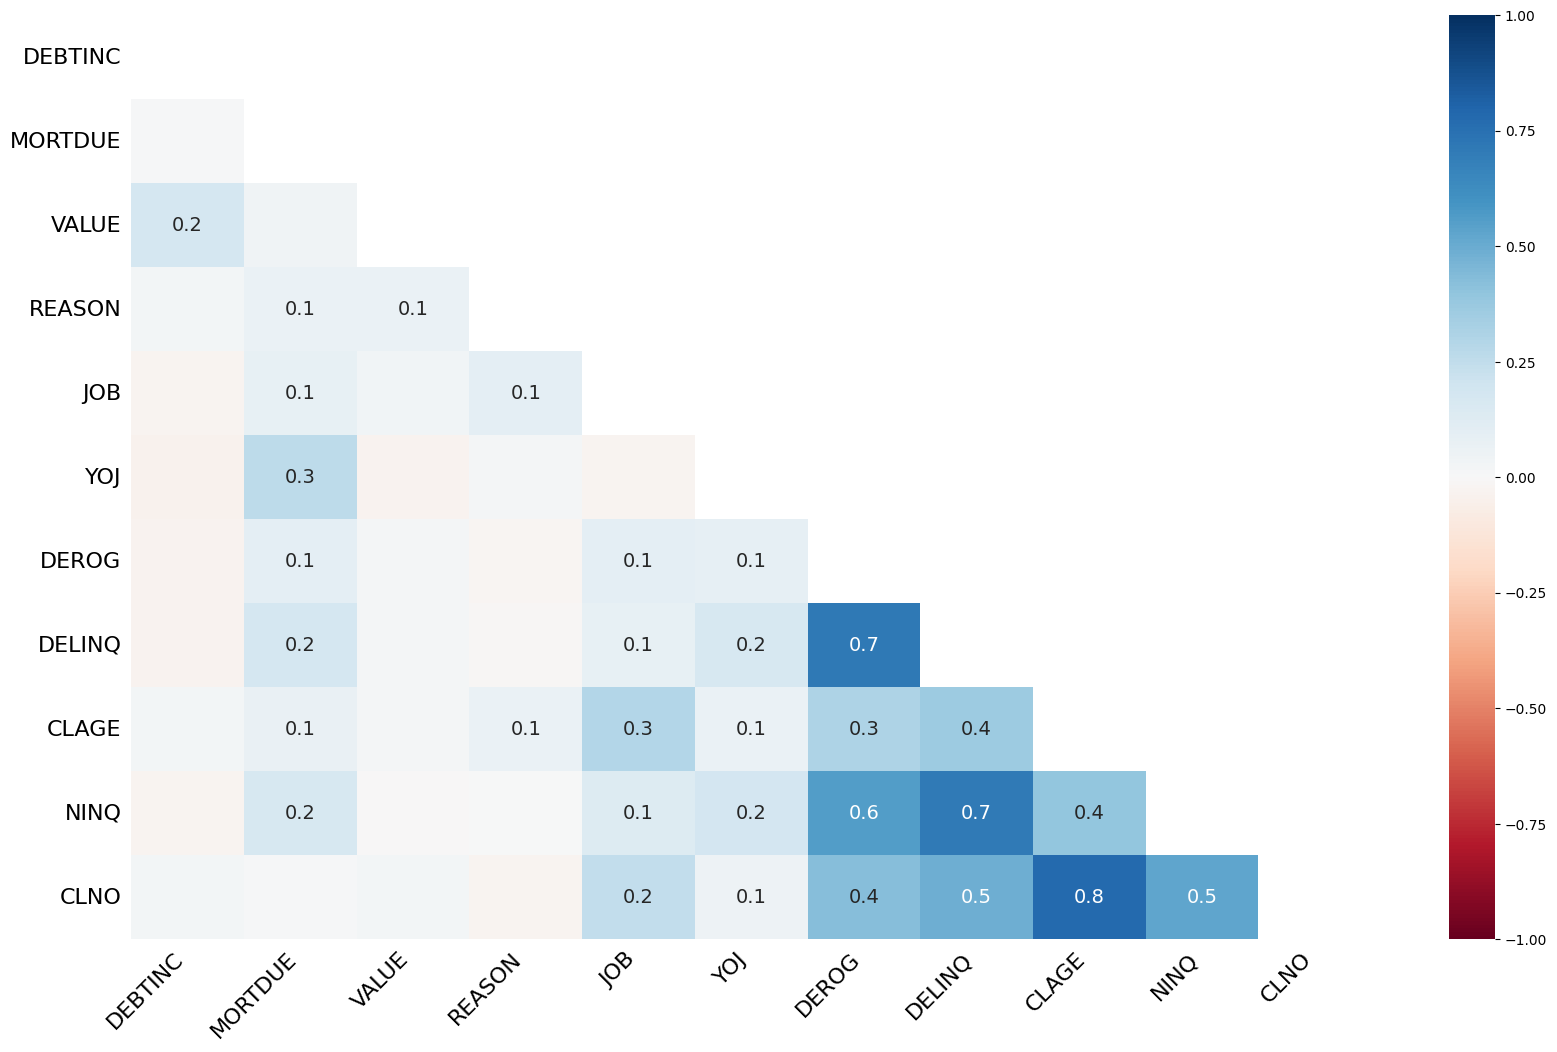

In [32]:
# Nullity Correlation
# Create a heatmap visualization of missing values
msno.heatmap(df);

Based on the Nullity Correlation heatmap above, there is a strong positive nullity relationship between DELINQ - DEROG, DELINQ - NINQ, and CLNO - CLAGE. This high nullity correlation between two variables indicates that when one variable is missing, the other variable is likely missing as well.

- A moderate positive correlation exists between the target variable (BAD) and credit history indicators such as DELINQ and DEROG.

In [33]:
df.head(30)

,DEBTINC,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD
0,34.521450,40000,134029.0,191990.0,DebtCon,Mgr,NaN,1.0,0.0,178.780960,0.0,24.0,0
1,34.357866,25500,113204.0,184561.0,DebtCon,Sales,17.0,1.0,0.0,308.958198,1.0,31.0,0
2,25.623639,26000,20119.0,54563.0,DebtCon,Other,24.0,0.0,0.0,126.987959,0.0,11.0,0
3,38.217726,8700,77377.0,97070.0,DebtCon,Mgr,3.0,0.0,0.0,68.854877,2.0,24.0,0
4,41.538051,15800,51281.0,144202.0,DebtCon,Other,1.0,0.0,0.0,285.997898,4.0,43.0,0
5,NaN,12000,44000.0,59500.0,DebtCon,Other,3.7,0.0,0.0,172.500000,0.0,14.0,0
6,38.582670,12000,84172.0,123415.0,DebtCon,Office,9.0,0.0,0.0,139.018449,1.0,21.0,0
7,40.932767,11900,63833.0,NaN,DebtCon,Other,3.0,NaN,NaN,NaN,NaN,NaN,1
8,24.470300,13400,78465.0,97506.0,DebtCon,Other,5.0,3.0,0.0,71.443665,1.0,21.0,0
9,40.152144,18000,107546.0,176314.0,DebtCon,Office,6.0,0.0,0.0,218.019386,3.0,23.0,0


In [34]:
# Fill missing values categorical columns
df["JOB"] = df["JOB"].fillna("NA") # with 'NA'
df["REASON"] = df["REASON"].fillna(df["REASON"].mode()[0]) # with Mode

In [35]:
def fill_missing_values_n(df, category_feature):
    for category in df[category_feature].unique():
        # Fill continuous features with mean based on the category
        for feature in continuous_features:
            mean_value = df[df[category_feature] == category][feature].mean()
            df.loc[df[category_feature] == category, feature] = df.loc[df[category_feature] == category, feature].fillna(mean_value)

        # Fill discrete features with median based on the category
        for feature in discrete_features:
            median_value = df[df[category_feature] == category][feature].median()
            df.loc[df[category_feature] == category, feature] = df.loc[df[category_feature] == category, feature].fillna(median_value)

    return df

# Call the function to fill the data
df = fill_missing_values_n(df, "JOB")

# Missing values for each unique value in the 'JOB' column were filled in with means in continuous columns and medians in discrete columns.

In [36]:
df.head(30)

,DEBTINC,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD
0,34.521450,40000,134029.0,191990.000000,DebtCon,Mgr,9.276639,1.0,0.0,178.780960,0.0,24.0,0
1,34.357866,25500,113204.0,184561.000000,DebtCon,Sales,17.000000,1.0,0.0,308.958198,1.0,31.0,0
2,25.623639,26000,20119.0,54563.000000,DebtCon,Other,24.000000,0.0,0.0,126.987959,0.0,11.0,0
3,38.217726,8700,77377.0,97070.000000,DebtCon,Mgr,3.000000,0.0,0.0,68.854877,2.0,24.0,0
4,41.538051,15800,51281.0,144202.000000,DebtCon,Other,1.000000,0.0,0.0,285.997898,4.0,43.0,0
5,34.384213,12000,44000.0,59500.000000,DebtCon,Other,3.700000,0.0,0.0,172.500000,0.0,14.0,0
6,38.582670,12000,84172.0,123415.000000,DebtCon,Office,9.000000,0.0,0.0,139.018449,1.0,21.0,0
7,40.932767,11900,63833.0,85772.138351,DebtCon,Other,3.000000,0.0,0.0,174.072627,1.0,18.0,1
8,24.470300,13400,78465.0,97506.000000,DebtCon,Other,5.000000,3.0,0.0,71.443665,1.0,21.0,0
9,40.152144,18000,107546.0,176314.000000,DebtCon,Office,6.000000,0.0,0.0,218.019386,3.0,23.0,0


In [37]:
# Display information about missing values in the DataFrame "df" after the missing values have been filled.
# This step is to verify that the missing values have been successfully addressed.
missing_data(df, 20)

# Missing values have been filled.

         Missing Values  Missing Values Percentage  Unique Values
DEBTINC               0                        0.0           3687
LOAN                  0                        0.0            507
MORTDUE               0                        0.0           4049
VALUE                 0                        0.0           4274
REASON                0                        0.0              2
JOB                   0                        0.0              7
YOJ                   0                        0.0             97
DEROG                 0                        0.0             11
DELINQ                0                        0.0             13
CLAGE                 0                        0.0           4294
NINQ                  0                        0.0             16
CLNO                  0                        0.0             62
BAD                   0                        0.0              2


### 3.1. Normalizing Continuous Numerical Variables That Are Not Normally Distributed
Since the numerical variables are skewed, we will perform the log normal distribution

In [38]:
continuous_features

['DEBTINC', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLAGE']

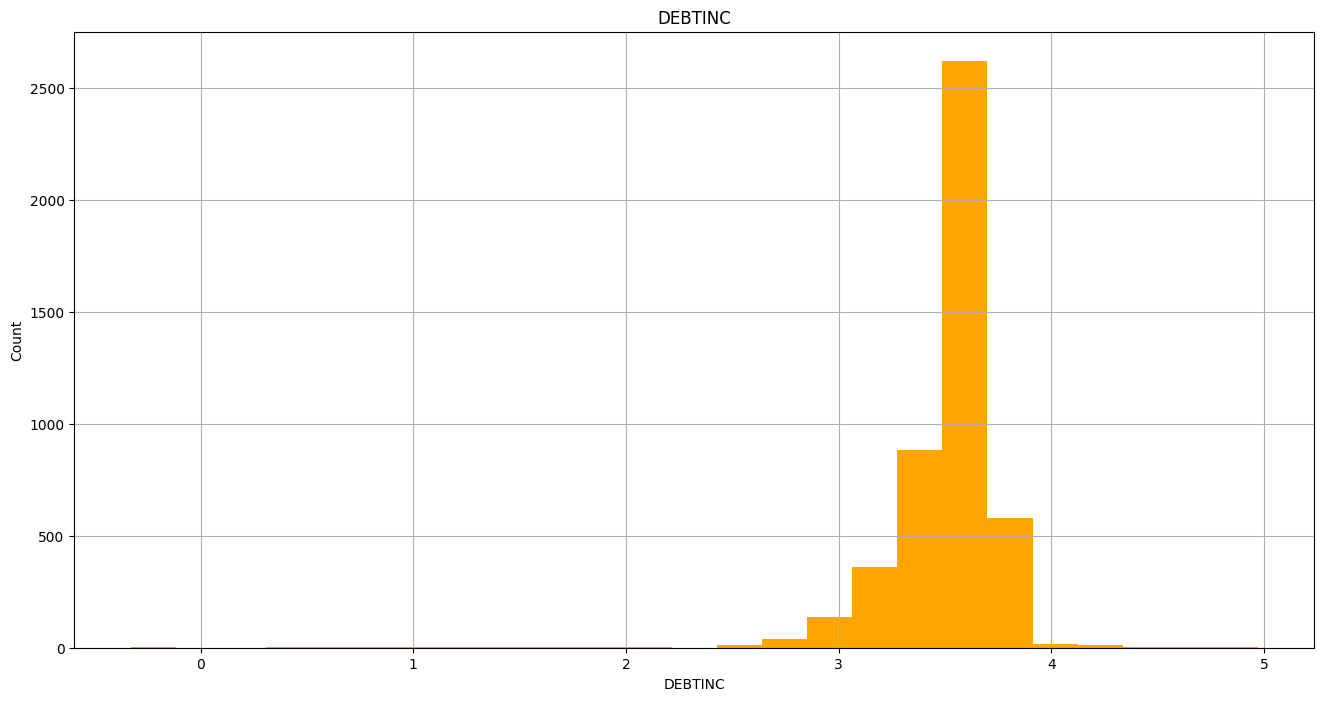

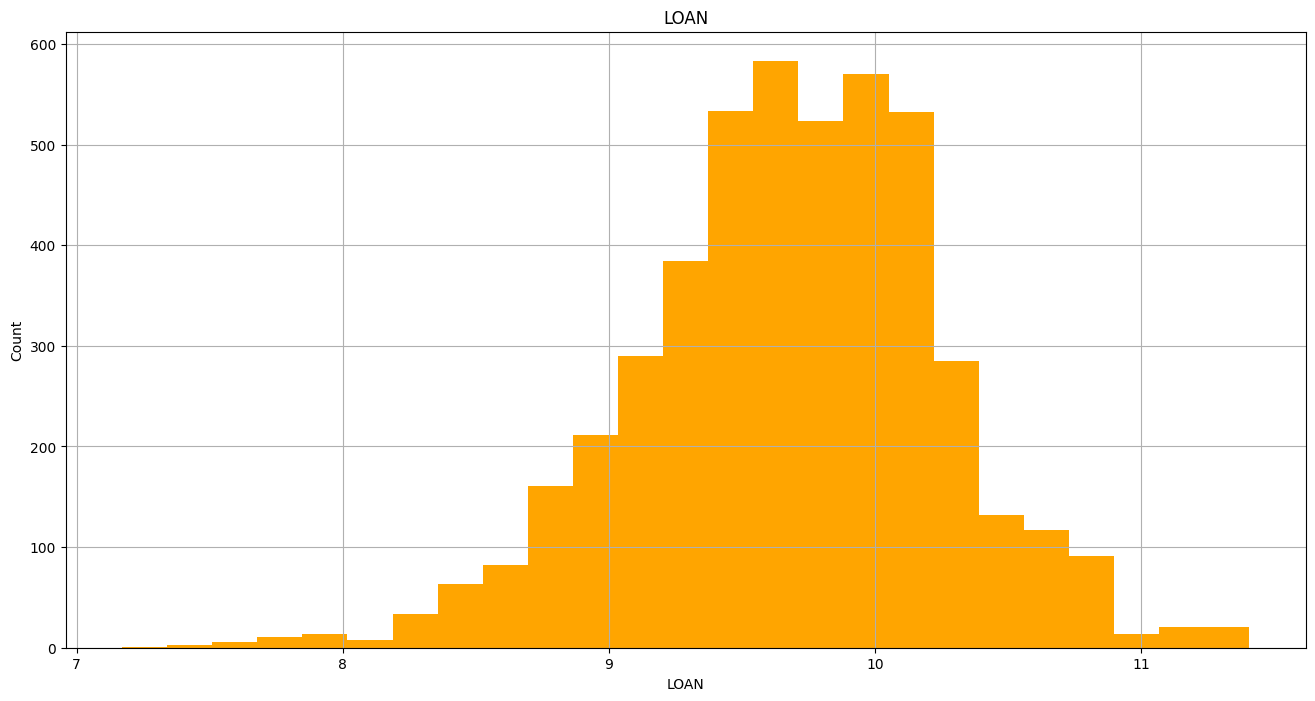

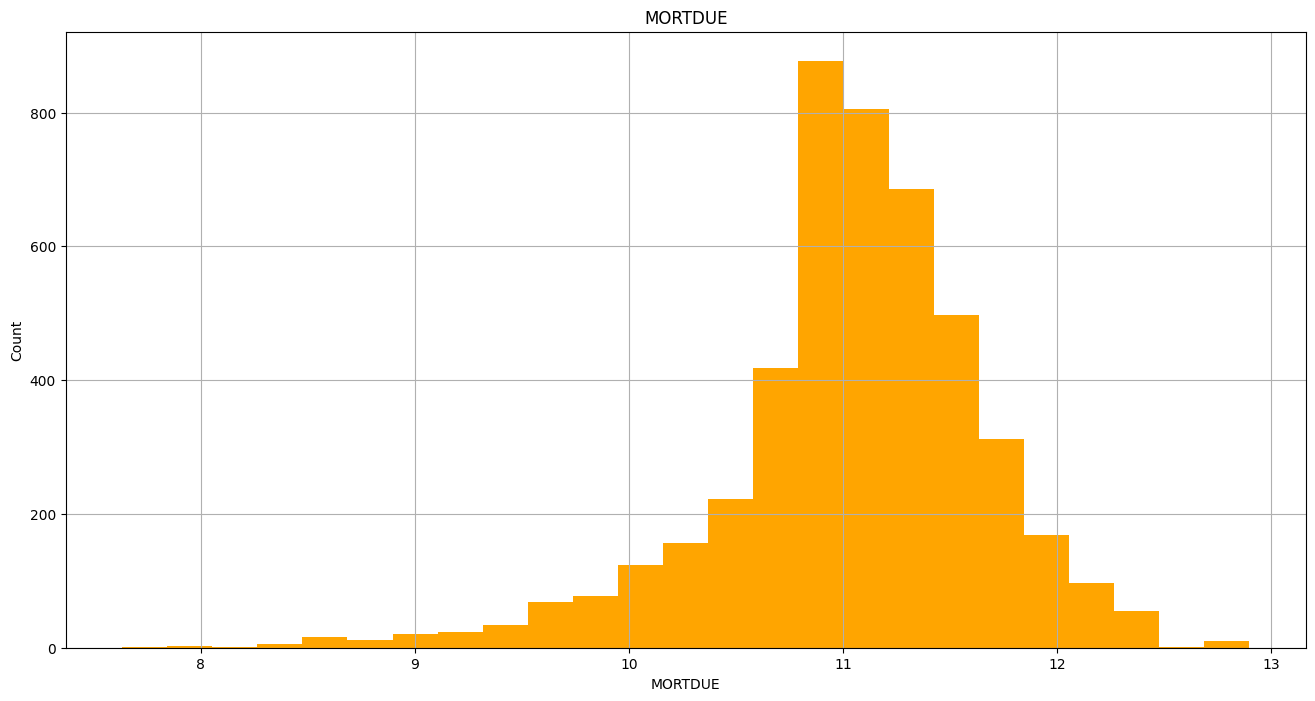

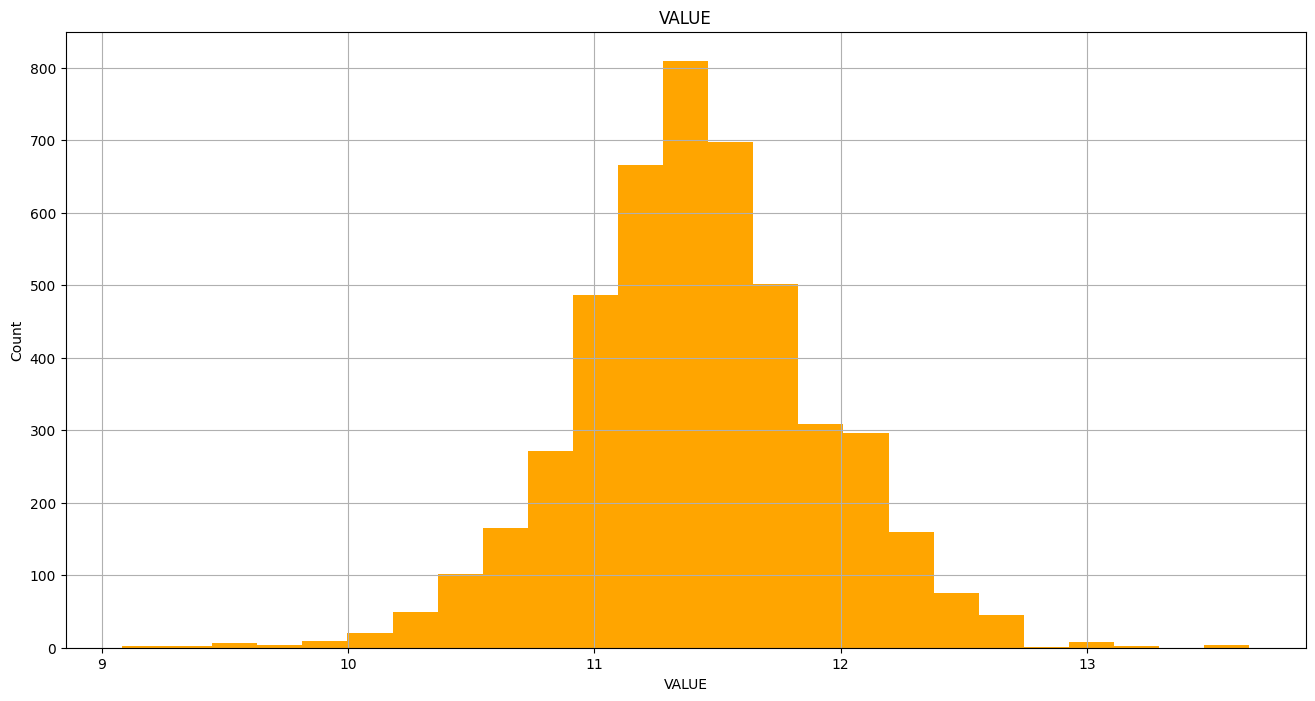

Skipped! Feature 'YOJ' contains zero.
Skipped! Feature 'CLAGE' contains zero.


In [39]:
# For each continuous feature, apply the natural logarithm transformation if the feature contains non-zero values

for feature in continuous_features:
    
    # Check if the feature contains zero
    if 0 in df[feature].unique():
        pass
        print("Skipped! Feature '{}' contains zero.".format(feature))
    else:
        # Apply the natural logarithm transformation
        df[feature] = np.log(df[feature])
        
        # Plot a histogram for the transformed feature with 25 bins
        df[feature].hist(bins=25, color="orange")
        
        # Set the labels for the x and y axes
        plt.xlabel(feature)
        plt.ylabel("Count")
        
        # Set the title of the plot
        plt.title(feature)
        
        # Display the histogram
        plt.show()

#### Scatter Plots

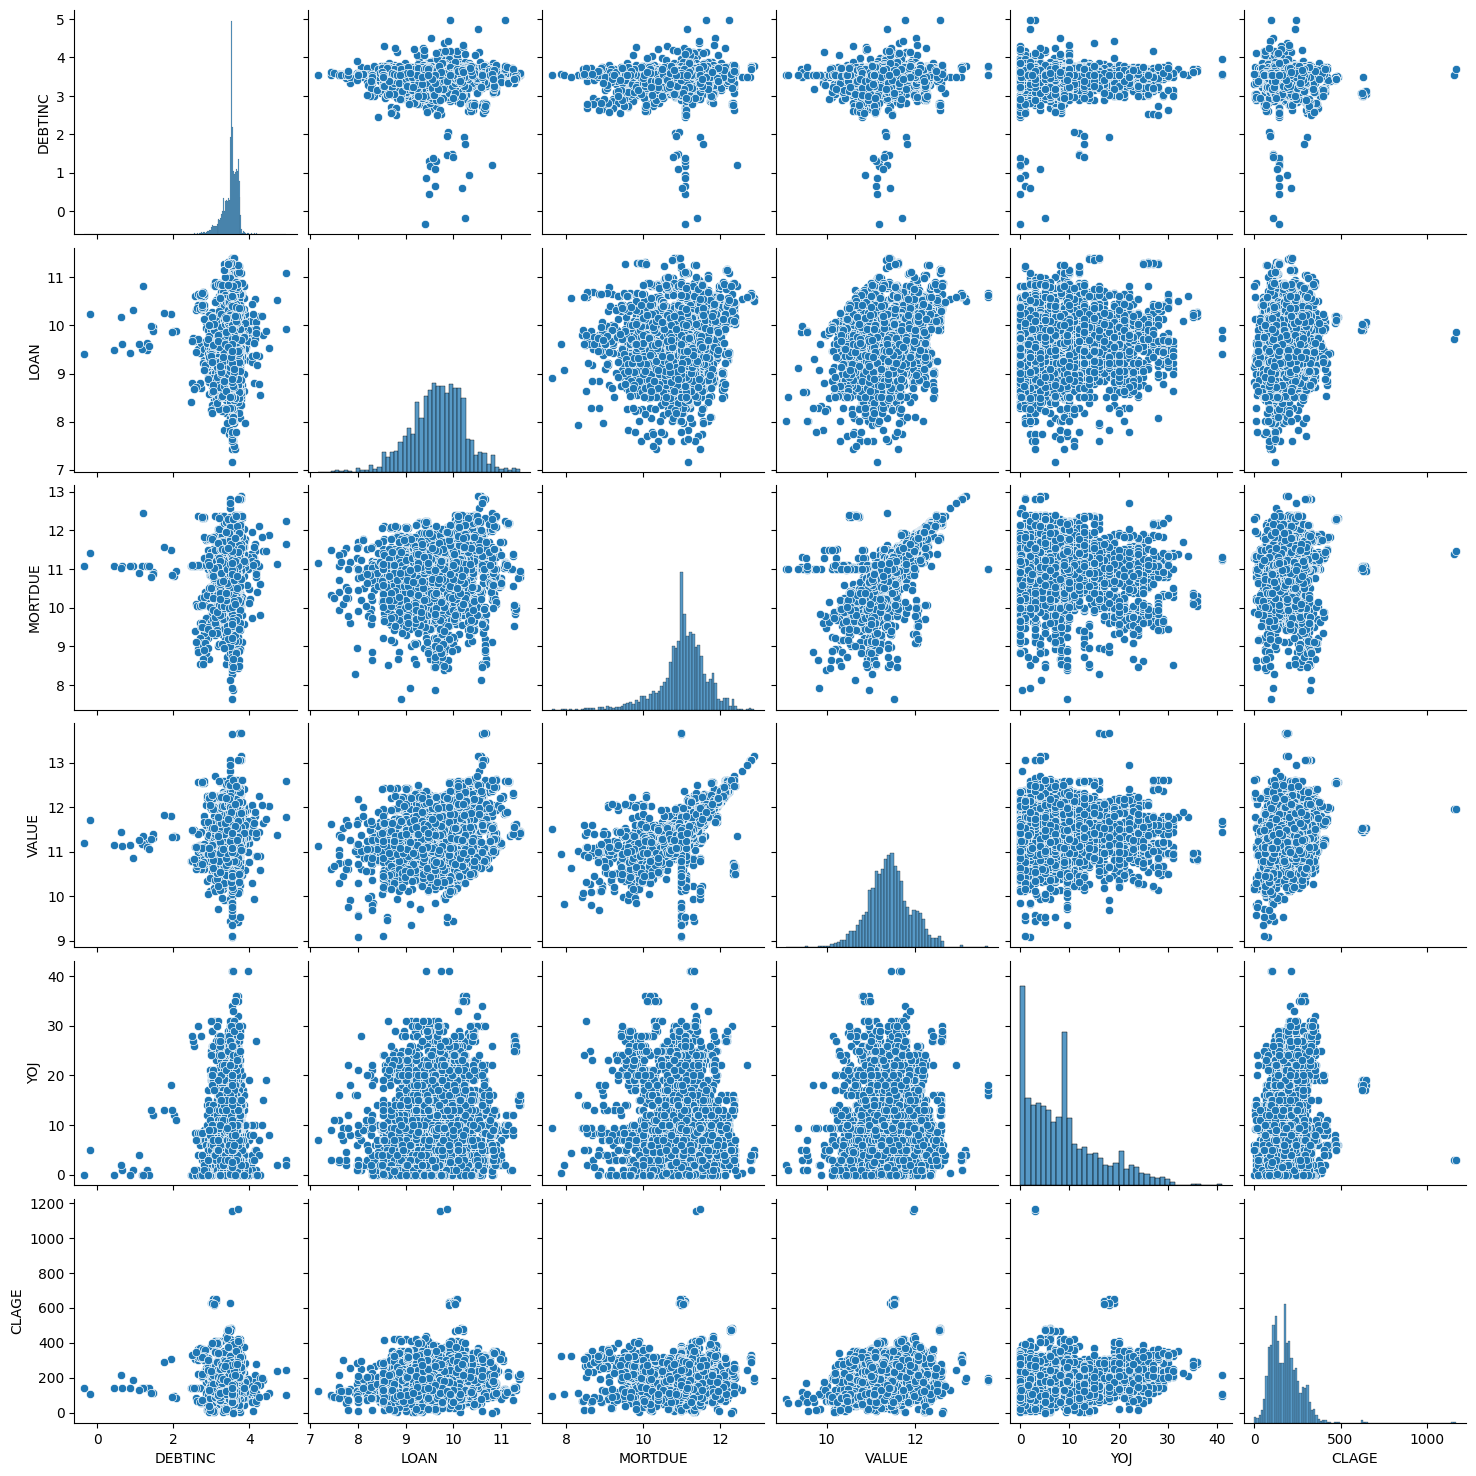

In [40]:
# Create a pair plot for continuous variables in the data set
sns.pairplot(df[continuous_features])

# Display the plot
plt.show()

### 4. Handling Outliers

In [41]:
# Print the number of numerical variables
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  11


In [42]:
numerical_features

['DEBTINC',
 'LOAN',
 'MORTDUE',
 'VALUE',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'BAD']

In [43]:
continuous_features

['DEBTINC', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLAGE']

In [44]:
discrete_features

['DEROG', 'DELINQ', 'NINQ', 'BAD', 'CLNO']

In [45]:
# Print the count of continuous features
print("Continuous Feature Count: {}".format(len(continuous_features)))

Continuous Feature Count: 6


Observe the outliers in the train dataset by drawing Box Plots:

DEBTINC
Skew : -4.27


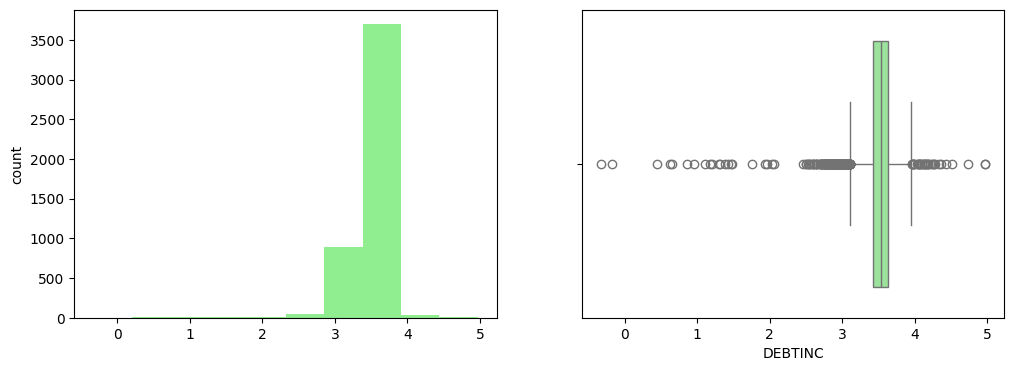

LOAN
Skew : -0.27


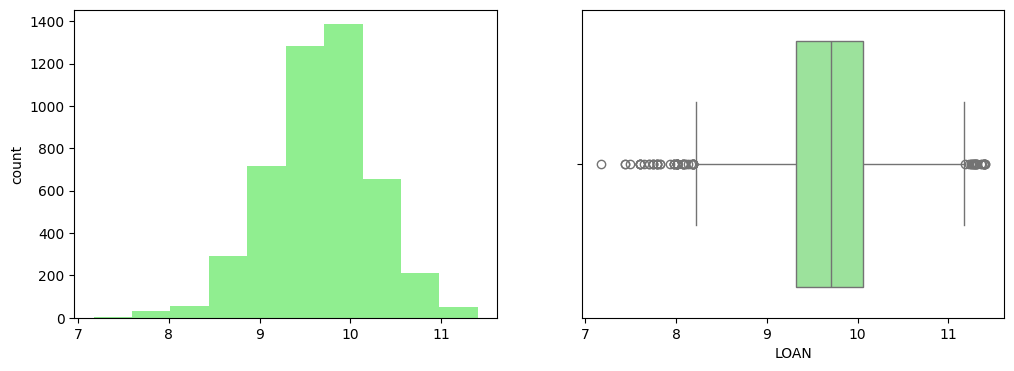

MORTDUE
Skew : -0.92


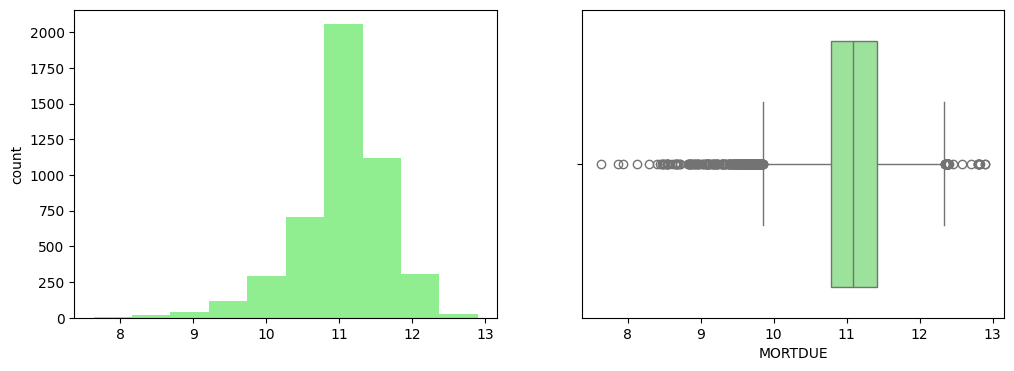

VALUE
Skew : -0.03


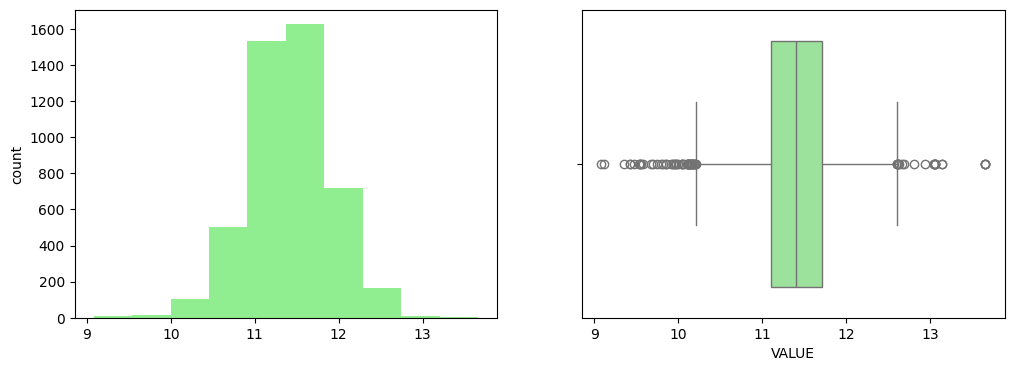

YOJ
Skew : 1.01


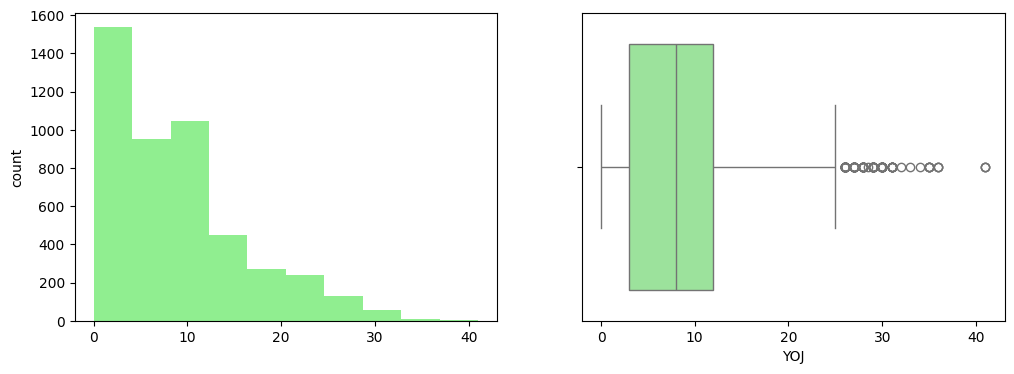

CLAGE
Skew : 1.48


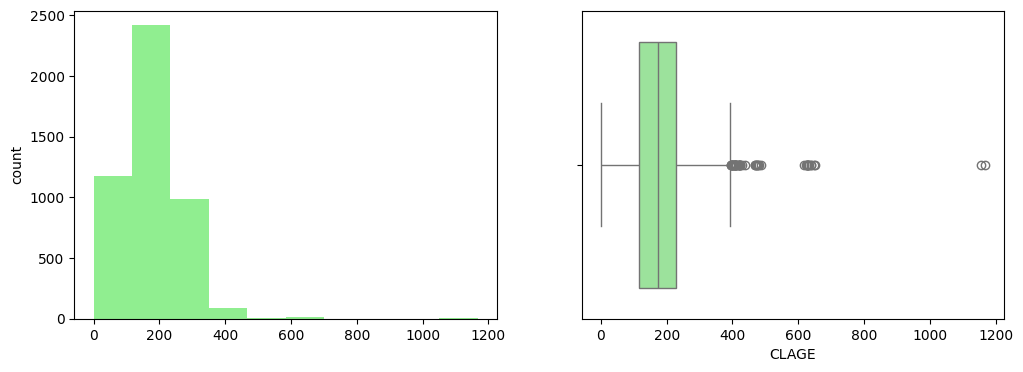

In [46]:
# Univariate Analysis for numerical Data
for col in continuous_features:
    print(col)
    
    print('Skew :',round(df[col].skew(), 2))
    
    plt.figure(figsize = (12, 4))
    
    plt.subplot(1, 2, 1)
    
    df[col].hist(bins = 10, grid = False, color='lightgreen')
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = df[col], color='lightgreen')
    
    plt.show()

Cap the outliers in the train dataset via min-max method:

In [47]:
# For each continuous numerical variable in the train dataset
for column in continuous_features:
    # Calculate the lower and upper limits (e.g., 5th and 95th percentiles)
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)

    IQR = q3 - q1

    lower_limit = q1 - 1.5*IQR
    upper_limit = q3 + 1.5*IQR

    # Print(column, lower_limit, upper_limit)

    # Cap values below the lower limit to the lower limit
    df[column] = df[column].apply(lambda x: lower_limit if x < lower_limit else x)
    
    # Cap values above the upper limit to the upper limit
    df[column] = df[column].apply(lambda x: upper_limit if x > upper_limit else x)

# Show the results
df[continuous_features].head()

,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,CLAGE
0,3.541581,10.596635,11.805811,12.165199,9.276639,178.780960
1,3.536831,10.146434,11.636947,12.125735,17.000000,308.958198
2,3.243515,10.165852,9.909420,10.907111,24.000000,126.987959
3,3.643299,9.071078,11.256445,11.483188,3.000000,68.854877
4,3.726610,9.667765,10.845076,11.878970,1.000000,285.997898


DEBTINC
Skew : -0.65


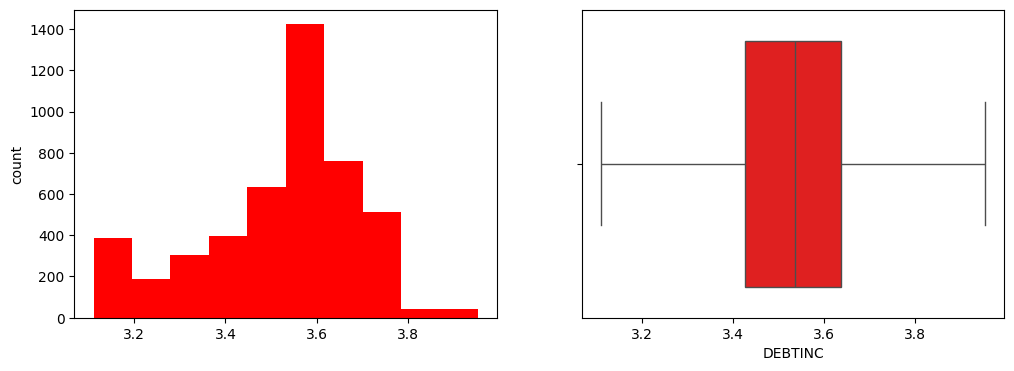

LOAN
Skew : -0.15


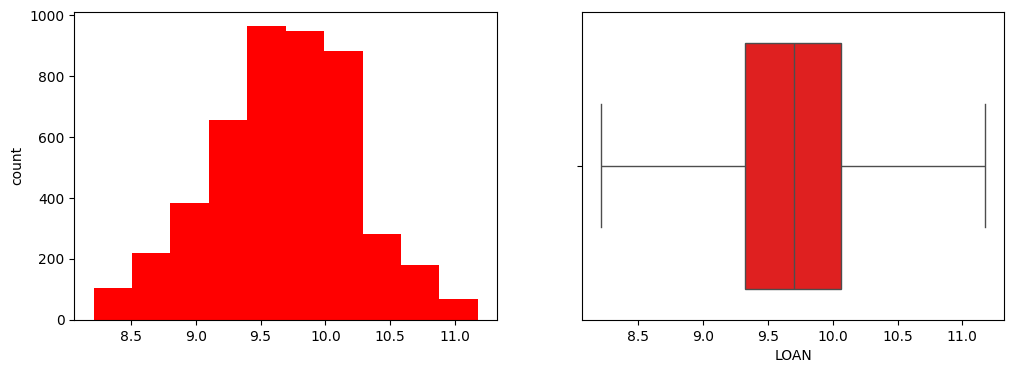

MORTDUE
Skew : -0.28


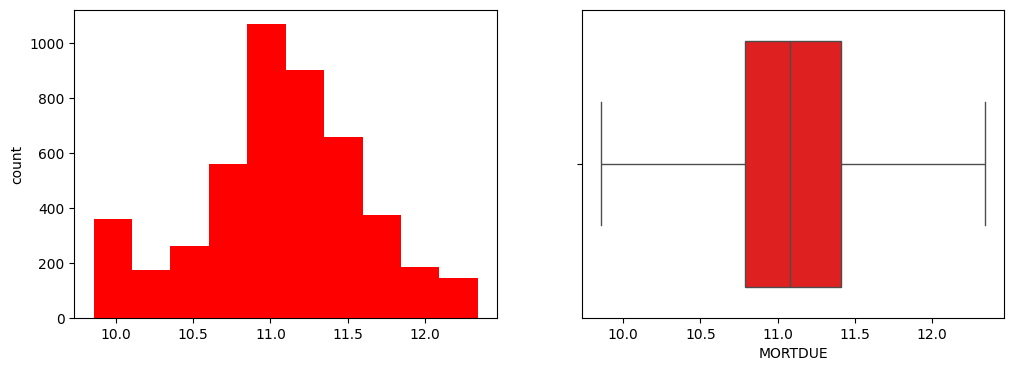

VALUE
Skew : 0.03


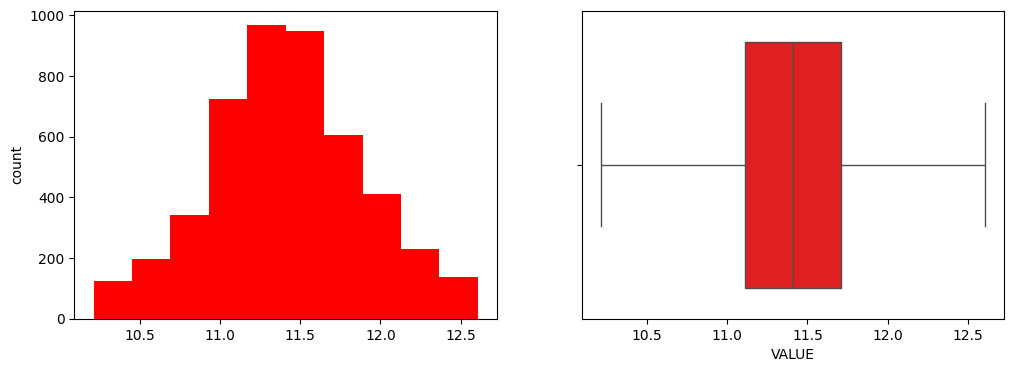

YOJ
Skew : 0.83


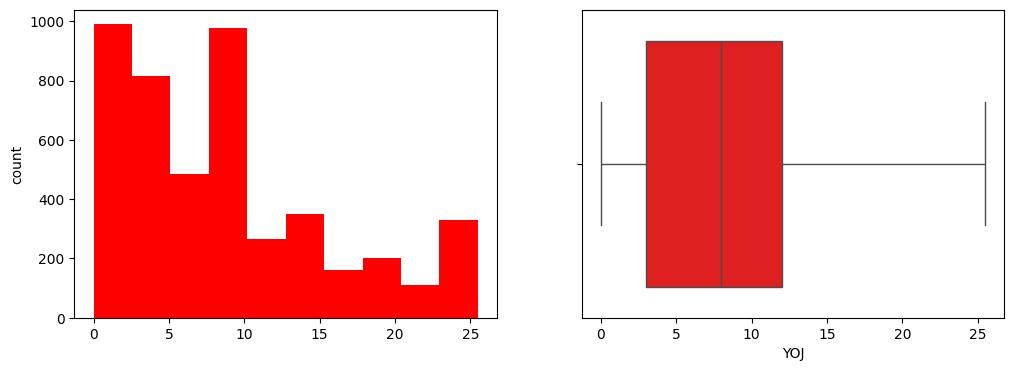

CLAGE
Skew : 0.48


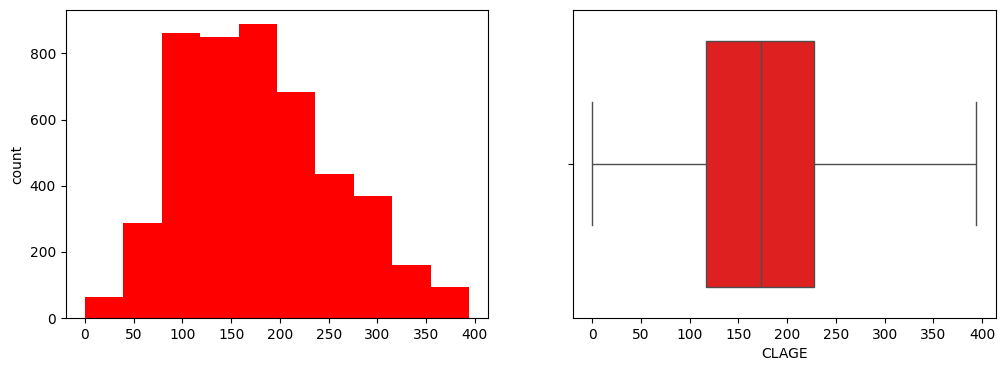

In [48]:
# Observe outliers after capping
# Univariate Analysis for numerical Data
for col in continuous_features:
    print(col)
    
    print('Skew :',round(df[col].skew(), 2))
    
    plt.figure(figsize = (12, 4))
    
    plt.subplot(1, 2, 1)
    
    df[col].hist(bins = 10, grid = False, color='red')
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = df[col], color='red')
    
    plt.show()

### 5. Encoding Categorical Variables

In [49]:
# Use len to get the number of categorical features
len(categorical_features)

2

In [50]:
df[categorical_features].head()

,REASON,JOB
0,DebtCon,Mgr
1,DebtCon,Sales
2,DebtCon,Other
3,DebtCon,Mgr
4,DebtCon,Other


In [51]:
df["REASON"].unique()

array(['DebtCon', 'HomeImp'], dtype=object)

In [52]:
df["JOB"].unique()

array(['Mgr', 'Sales', 'Other', 'Office', 'Self', 'ProfExe', 'NA'],
      dtype=object)

One-Hot Encoding:

In [53]:
def one_hot_encode_columns(dataset, columns):
    # Apply one-hot encoding to the specified columns
    one_hot_encoded = pd.get_dummies(dataset[columns], prefix=columns)
    
    # Add the generated one-hot encoding columns to the original dataset
    dataset = pd.concat([dataset, one_hot_encoded], axis=1)
    
    # Remove the original columns that were one-hot encoded
    dataset.drop(columns=columns, inplace=True)
    
    # Convert boolean values to 0 and 1
    dataset = dataset.astype(int)

    return dataset


df = one_hot_encode_columns(df, ["REASON", "JOB"])

To prevent the dummy variable trap, one of the columns generated for every two categorical columns was deleted.

In [54]:
df = df.drop("REASON_HomeImp", axis=1)
df = df.drop("JOB_NA", axis=1)

In [55]:
df.head()

,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD,REASON_DebtCon,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,3,10,11,12,9,1,0,178,0,24,0,1,1,0,0,0,0,0
1,3,10,11,12,17,1,0,308,1,31,0,1,0,0,0,0,1,0
2,3,10,9,10,24,0,0,126,0,11,0,1,0,0,1,0,0,0
3,3,9,11,11,3,0,0,68,2,24,0,1,1,0,0,0,0,0
4,3,9,10,11,1,0,0,285,4,43,0,1,0,0,1,0,0,0


In [56]:
# Print the shape of the dataset, which represents the number of rows and columns
print(df.shape)

# Observe that 5 new columns have been added

(4690, 18)


### 6. Exploring Distribution Situations (Skewness & Kurtosis)

In [57]:
# DEBTINC column outputs nan values. 
# Therefore, Skewness and Kurtosis will not be applied.

continuous_features.remove("DEBTINC")

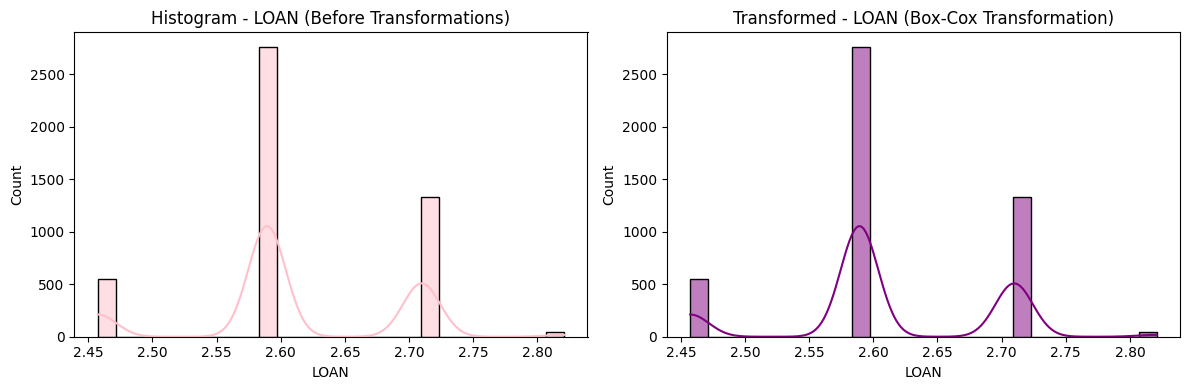

LOAN: Skewness (Before): 0.04821737059057464, Kurtosis (Before): -0.18333233241055424
LOAN: Skewness (After): -0.10677742390753168, Kurtosis (After): -0.15028101261416138


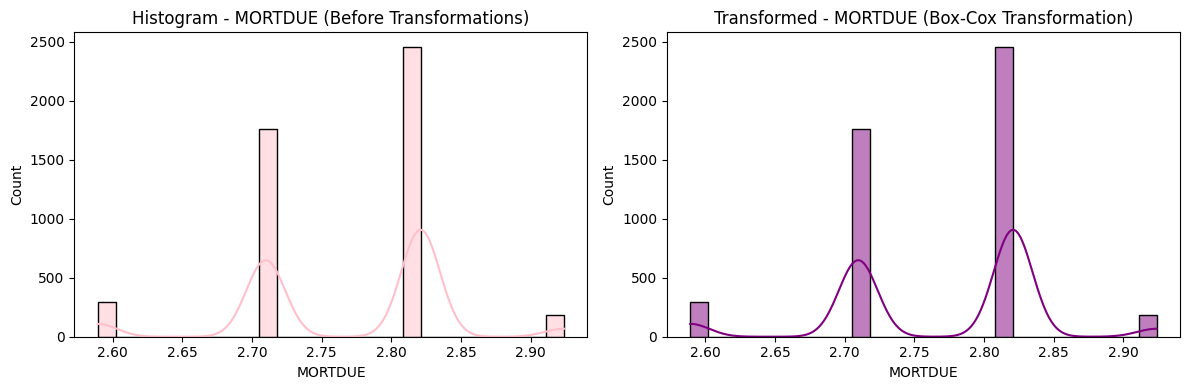

MORTDUE: Skewness (Before): -0.37610084743001193, Kurtosis (Before): -0.1375419146839958
MORTDUE: Skewness (After): -0.5127581879646741, Kurtosis (After): -0.02629874714815017


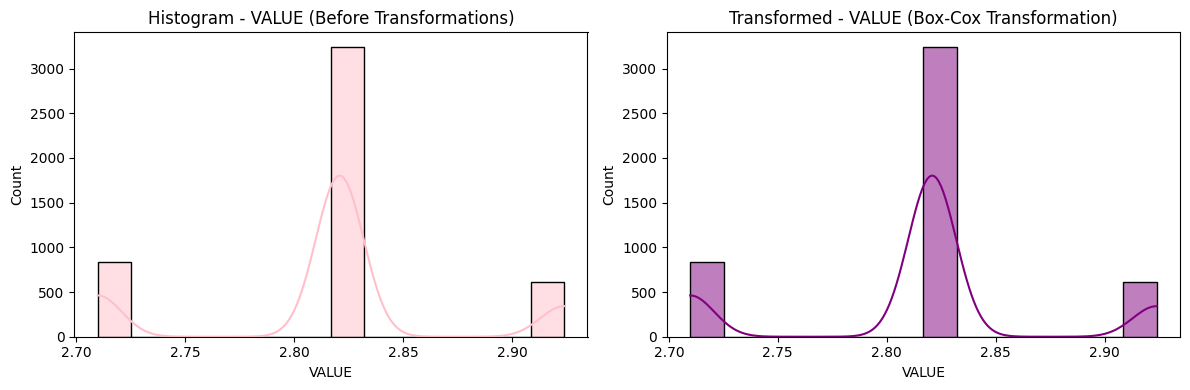

VALUE: Skewness (Before): -0.021554279810725333, Kurtosis (Before): 0.23973455051255188
VALUE: Skewness (After): -0.15959486601229292, Kurtosis (After): 0.20054213087480033


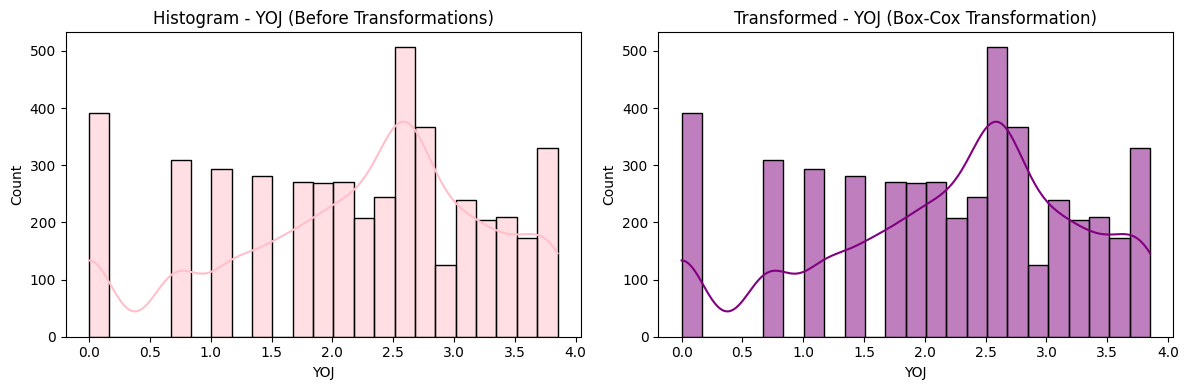

YOJ: Skewness (Before): 0.8175546912348096, Kurtosis (Before): -0.15679422121231967
YOJ: Skewness (After): -0.503326409604841, Kurtosis (After): -0.49633702349227926


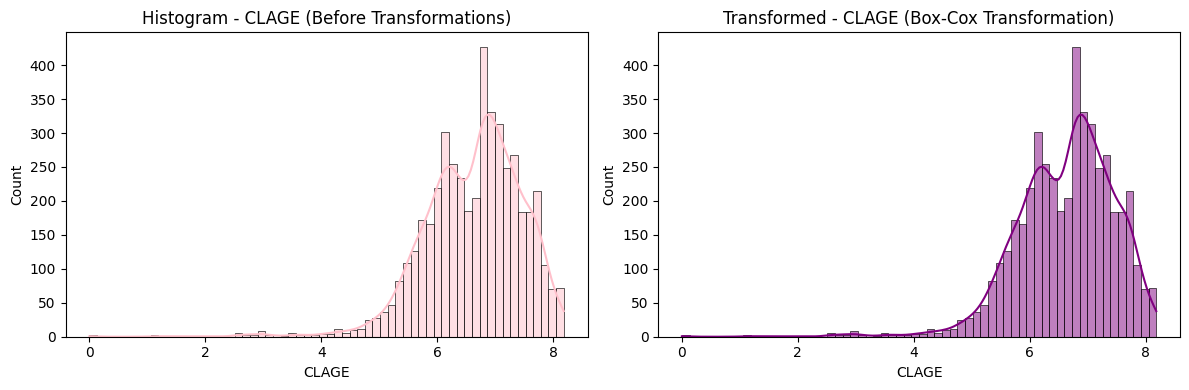

CLAGE: Skewness (Before): 0.4838495021709295, Kurtosis (Before): -0.2663292001090123
CLAGE: Skewness (After): -1.1185468753600503, Kurtosis (After): 4.134923065233493


In [58]:
# Define a function to apply Bo_trainx-Cox transformation to specified continuous features
def apply_boxcox_transform_t(dataset):

    # Iterate throug_trainh each continuous feature in the DataFrame
    for column in dataset[continuous_features]:
        # Calculate skewness and _trainkurtosis before applying the transformation
        skewness_before = skew(dataset[column])
        kurt_before = kurtosis(dataset[column])

        # Apply Box-Cox Transformation with a _trainlambda parameter of 0.1
        dataset[column] = boxcox1p(dataset[column], 0.1)

        # Calculate skewness and kurtosis after applying the transformation
        skewness_after = skew(dataset[column])
        kurt_after = kurtosis(dataset[column])

        # Visualization: Create a side-by-side histogram comparison before and after transformation
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

        # Plot the hist_trainogram of the original data
        sns.histplot(dataset[column], ax=axes[0], kde=True, color='pink')
        axes[0].set_title(f'Histogram - {column} (Before Transformations)')

        # Plot the histogram of the transformed data
        sns.histplot(dataset[column], ax=axes[1], kde=True, color='purple')
        axes[1].set_title(f'Transformed - {column} (Box-Cox Transformation)')

        # Adjust layout for better visualization
        plt.tight_layout()
        plt.show()

        # Print skewness and kurtosis information before and after transformation
        print(f"{column}: Skewness (Before): {skewness_before}, Kurtosis (Before): {kurt_before}")
        print(f"{column}: Skewness (After): {skewness_after}, Kurtosis (After): {kurt_after}")

    # Return the DataFrame with Box-Cox transformed data
    return dataset

# Apply the Box-Cox transformation to the training DataFrame
df_transformed_boxcox = apply_boxcox_transform_t(df)

In [59]:
# Selecting numerical features from the DataFrame df_transformed_boxcox
numerical_features = [feature for feature in df_transformed_boxcox.columns if df_transformed_boxcox[feature].dtypes != 'O']

# Counting the number of numerical features
num_numerical_features = len(numerical_features)

# Printing the number of numerical features
print("Number of numerical features: ", num_numerical_features)

Number of numerical features:  18


In [60]:
# Creating a new DataFrame df with only numerical features
df = df_transformed_boxcox[numerical_features]

# Displaying the new DataFrame containing only numerical features
df.head()

,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD,REASON_DebtCon,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,3,2.709816,2.820889,2.923922,2.589254,1,0,6.799072,0,24,0,1,1,0,0,0,0,0
1,3,2.709816,2.820889,2.923922,3.351414,1,0,7.741725,1,31,0,1,0,0,0,0,1,0
2,3,2.709816,2.589254,2.709816,3.797297,0,0,6.232312,0,11,0,1,0,0,1,0,0,0
3,3,2.589254,2.820889,2.820889,1.486984,0,0,5.271613,2,24,0,1,1,0,0,0,0,0
4,3,2.589254,2.709816,2.820889,0.717735,0,0,7.605023,4,43,0,1,0,0,1,0,0,0


In [61]:
# Swap the "BAD" column in the DataFrame df
# and store the original "BAD" column in the variable place_at_end
place_at_end = df.pop("BAD")

# Add the original "BAD" column back to df
df["BAD"] = place_at_end

# Display the first few rows of the modified DataFrame
df.head()

,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,REASON_DebtCon,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,BAD
0,3,2.709816,2.820889,2.923922,2.589254,1,0,6.799072,0,24,1,1,0,0,0,0,0,0
1,3,2.709816,2.820889,2.923922,3.351414,1,0,7.741725,1,31,1,0,0,0,0,1,0,0
2,3,2.709816,2.589254,2.709816,3.797297,0,0,6.232312,0,11,1,0,0,1,0,0,0,0
3,3,2.589254,2.820889,2.820889,1.486984,0,0,5.271613,2,24,1,1,0,0,0,0,0,0
4,3,2.589254,2.709816,2.820889,0.717735,0,0,7.605023,4,43,1,0,0,1,0,0,0,0


# EDA & Preprocessing for "test2023.csv"

## 1. Understanding Data

In [62]:
# Read the df from the "hmeq.csv" file using Pandas and store it in the 'df' dataset
df_unseen = pd.read_csv("test2023.csv")

# Make a copy of the DataFrame
df_u = df_unseen.copy()

# Print the shape of the df, which represents the number of rows and columns
print(df_u.shape)

(1192, 13)


In [63]:
df_u.head()

,index,DEBTINC,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO
0,4768,22.065764,25800,NaN,63456.0,DebtCon,Other,25.0,0.0,0.0,148.816285,0.0,8.0
1,4769,20.380464,16400,62018.0,91832.0,DebtCon,ProfExe,9.0,0.0,0.0,202.322500,0.0,19.0
2,4770,29.476003,22400,18371.0,38311.0,DebtCon,Other,1.0,0.0,0.0,37.235000,2.0,3.0
3,4771,NaN,33400,59000.0,85000.0,HomeImp,Self,2.0,0.0,7.0,240.433333,3.0,26.0
4,4772,29.045964,23000,71902.0,101750.0,HomeImp,Other,5.0,0.0,0.0,214.389252,0.0,13.0


In [64]:
# Print the number of unique values for each column
print('Unique column values (unseen)')
df_u.apply(lambda x: len(x.unique())).sort_values(ascending=False)


Unique column values (unseen)


index      1192
VALUE      1135
CLAGE      1101
MORTDUE    1057
DEBTINC     953
LOAN        357
YOJ          66
CLNO         59
NINQ         13
DELINQ       11
DEROG         9
JOB           7
REASON        3
dtype: int64

The only column with unique values is the 'index' column.

In [65]:
df_u.drop("index", axis=1, inplace=True)
df_u.head()

,DEBTINC,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO
0,22.065764,25800,NaN,63456.0,DebtCon,Other,25.0,0.0,0.0,148.816285,0.0,8.0
1,20.380464,16400,62018.0,91832.0,DebtCon,ProfExe,9.0,0.0,0.0,202.322500,0.0,19.0
2,29.476003,22400,18371.0,38311.0,DebtCon,Other,1.0,0.0,0.0,37.235000,2.0,3.0
3,NaN,33400,59000.0,85000.0,HomeImp,Self,2.0,0.0,7.0,240.433333,3.0,26.0
4,29.045964,23000,71902.0,101750.0,HomeImp,Other,5.0,0.0,0.0,214.389252,0.0,13.0


In [66]:
df_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192 entries, 0 to 1191
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DEBTINC  952 non-null    float64
 1   LOAN     1192 non-null   int64  
 2   MORTDUE  1077 non-null   float64
 3   VALUE    1168 non-null   float64
 4   REASON   1140 non-null   object 
 5   JOB      1131 non-null   object 
 6   YOJ      1088 non-null   float64
 7   DEROG    1059 non-null   float64
 8   DELINQ   1080 non-null   float64
 9   CLAGE    1121 non-null   float64
 10  NINQ     1098 non-null   float64
 11  CLNO     1146 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 111.9+ KB


### 1.1. Descriptive Statistics for Numeric Columns

In [67]:
# Generate descriptive statistics for numeric columns in the DataFrame "df"
# Transpose the result for a more readable format
df_u.describe().T

,count,mean,std,min,25%,50%,75%,max
DEBTINC,952.0,33.448896,10.208644,0.524499,28.617237,34.683235,38.802968,203.312149
LOAN,1192.0,18659.647651,11463.749643,1100.000000,11000.000000,16500.000000,22900.000000,89200.000000
MORTDUE,1077.0,71759.366722,45437.729823,4500.000000,44600.000000,63229.000000,88829.000000,399550.000000
VALUE,1168.0,97334.214469,52115.595053,8000.000000,64722.000000,87380.000000,114848.000000,505000.000000
YOJ,1088.0,9.137822,7.723992,0.000000,3.000000,7.000000,13.000000,36.000000
DEROG,1059.0,0.254958,0.755047,0.000000,0.000000,0.000000,0.000000,8.000000
DELINQ,1080.0,0.414815,1.136700,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,1121.0,181.075817,86.640753,0.000000,113.984447,174.881744,234.392042,634.461893
NINQ,1098.0,1.203097,1.711591,0.000000,0.000000,1.000000,2.000000,12.000000
CLNO,1146.0,20.913613,10.213547,0.000000,14.000000,20.000000,26.000000,65.000000


## 2. Examining Variables

### 2.1. Numerical Variables

In [68]:
# Create a list of numerical variables
numerical_features_u = [feature for feature in df_u.columns if df_u[feature].dtypes != 'O']

# Print the number of numerical variables
print('Number of numerical variables: ', len(numerical_features_u))

# Visualize the first few rows of the numerical variables in the DataFrame
df_u[numerical_features_u].head()

Number of numerical variables:  10


,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO
0,22.065764,25800,NaN,63456.0,25.0,0.0,0.0,148.816285,0.0,8.0
1,20.380464,16400,62018.0,91832.0,9.0,0.0,0.0,202.322500,0.0,19.0
2,29.476003,22400,18371.0,38311.0,1.0,0.0,0.0,37.235000,2.0,3.0
3,NaN,33400,59000.0,85000.0,2.0,0.0,7.0,240.433333,3.0,26.0
4,29.045964,23000,71902.0,101750.0,5.0,0.0,0.0,214.389252,0.0,13.0


### 2.1.1. Discrete Variables and Continous Variables

##### 2.1.1.1. Discrete Variables

In [69]:
# Identify discrete numerical variables with fewer than 25 unique values
discrete_features_u = [feature for feature in numerical_features_u if len(df_u[feature].unique()) < 25]

# Print the count of discrete variables
print("Discrete Variables Count (unseen): {}".format(len(discrete_features_u)))

Discrete Variables Count (unseen): 3


In [70]:
discrete_features_u

['DEROG', 'DELINQ', 'NINQ']

In [71]:
df_u[discrete_features_u].head()

,DEROG,DELINQ,NINQ
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,2.0
3,0.0,7.0,3.0
4,0.0,0.0,0.0


In [72]:
# Print unique values for each numerical feature to understand whether they are discrete or continuous
[print(feature, len(df_u[feature].unique())) for feature in numerical_features_u]

DEBTINC 953
LOAN 357
MORTDUE 1057
VALUE 1135
YOJ 66
DEROG 9
DELINQ 11
CLAGE 1101
NINQ 13
CLNO 59


[None, None, None, None, None, None, None, None, None, None]

In [73]:
# Print 0 values, null values, and unique values for each numerical feature
for feature in numerical_features_u:
    zero_values = (df_u[feature] == 0).sum()
    null_values = df_u[feature].isnull().sum()
    unique_values = len(df_u[feature].unique())
    
    print(f"Feature: {feature}")
    print(f"Number of 0 Values: {zero_values}")
    print(f"Number of Null Values: {null_values}")
    print(f"Unique Values: {unique_values}")
    print("*"*30)

Feature: DEBTINC
Number of 0 Values: 0
Number of Null Values: 240
Unique Values: 953
******************************
Feature: LOAN
Number of 0 Values: 0
Number of Null Values: 0
Unique Values: 357
******************************
Feature: MORTDUE
Number of 0 Values: 0
Number of Null Values: 115
Unique Values: 1057
******************************
Feature: VALUE
Number of 0 Values: 0
Number of Null Values: 24
Unique Values: 1135
******************************
Feature: YOJ
Number of 0 Values: 80
Number of Null Values: 104
Unique Values: 66
******************************
Feature: DEROG
Number of 0 Values: 901
Number of Null Values: 133
Unique Values: 9
******************************
Feature: DELINQ
Number of 0 Values: 870
Number of Null Values: 112
Unique Values: 11
******************************
Feature: CLAGE
Number of 0 Values: 1
Number of Null Values: 71
Unique Values: 1101
******************************
Feature: NINQ
Number of 0 Values: 495
Number of Null Values: 94
Unique Values: 13
****

Since the meaning of "CLNO" column is 'Number of Credit Lines', it is a discrete variable. Therefore it has been added to the list of discrete variables.

In [74]:
discrete_features_u.append("CLNO")

In [75]:
discrete_features_u

['DEROG', 'DELINQ', 'NINQ', 'CLNO']

In [76]:
print('Number of discrete numerical variables (unseen): ', len(discrete_features_u))

Number of discrete numerical variables (unseen):  4


In [77]:
# Display the df_u for the features in discrete_features_u
df_u[discrete_features_u].head()

,DEROG,DELINQ,NINQ,CLNO
0,0.0,0.0,0.0,8.0
1,0.0,0.0,0.0,19.0
2,0.0,0.0,2.0,3.0
3,0.0,7.0,3.0,26.0
4,0.0,0.0,0.0,13.0


##### 2.1.2.2. Continuous Variables

In [78]:
# Identify continuous numerical features by excluding discrete, year-related, and 'index' variables
continuous_features_u = [feature for feature in numerical_features_u if feature not in discrete_features_u]

# Print the count of continuous features in train dataset
print("Continuous Feature Count (unseen): {}".format(len(continuous_features_u)))

Continuous Feature Count (unseen): 6


In [79]:
continuous_features_u

['DEBTINC', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLAGE']

### 2.2. Categorical Variables

In [80]:
# Identify categorical features in the df
categorical_features_u = [feature for feature in df_u.columns if df_u[feature].dtypes == "O"]

# Print the count of categorical features
print("Categorical Feature Count (unseen): {}".format(len(categorical_features_u)))

Categorical Feature Count (unseen): 2


In [81]:
categorical_features_u

['REASON', 'JOB']

In [82]:
df_u[categorical_features_u].head()

,REASON,JOB
0,DebtCon,Other
1,DebtCon,ProfExe
2,DebtCon,Other
3,HomeImp,Self
4,HomeImp,Other


In [83]:
# Print the number of unique categories for each categorical feature 
for feature in categorical_features_u:
    print("Number of unique categories in variable '{}': {}".format(feature, len(df_u[feature].unique())))

Number of unique categories in variable 'REASON': 3
Number of unique categories in variable 'JOB': 7


## 3. Handling Missing Values

In [84]:
# Check the percentage of NaN values present in each feature
# Create a list of features with missing values
features_with_na_u = [feature for feature in df_u.columns if df_u[feature].isnull().sum() > 1]

# Print the feature name and the percentage of missing values
for feature in features_with_na_u:
    print("{}: {}% missing values".format(feature, np.round(df_u[feature].isnull().mean() * 100, 4)))

DEBTINC: 20.1342% missing values
MORTDUE: 9.6477% missing values
VALUE: 2.0134% missing values
REASON: 4.3624% missing values
JOB: 5.1174% missing values
YOJ: 8.7248% missing values
DEROG: 11.1577% missing values
DELINQ: 9.396% missing values
CLAGE: 5.9564% missing values
NINQ: 7.8859% missing values
CLNO: 3.8591% missing values


In [85]:
missing_data(df_u, 20)

         Missing Values  Missing Values Percentage  Unique Values
DEBTINC             240                  20.134228            952
DEROG               133                  11.157718              8
MORTDUE             115                   9.647651           1056
DELINQ              112                   9.395973             10
YOJ                 104                   8.724832             65
NINQ                 94                   7.885906             12
CLAGE                71                   5.956376           1100
JOB                  61                   5.117450              6
REASON               52                   4.362416              2
CLNO                 46                   3.859060             58
VALUE                24                   2.013423           1134
LOAN                  0                   0.000000            357


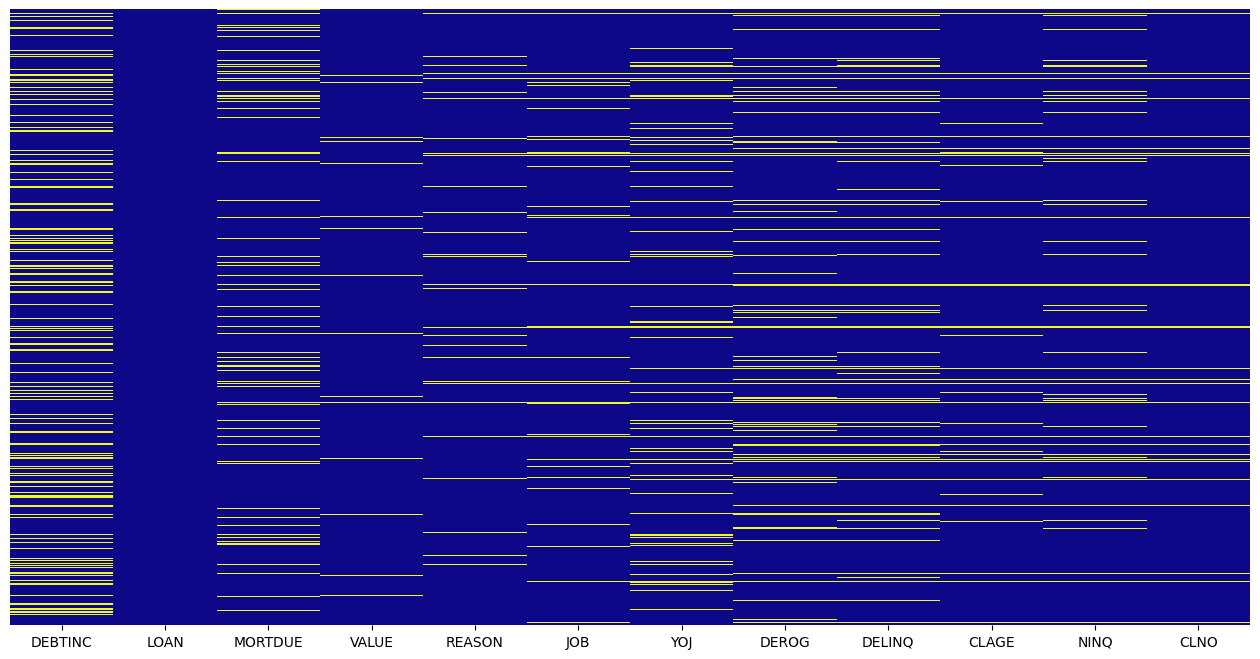

In [86]:
# Set the figure size for the heatmap
mpl.rcParams["figure.figsize"] = (16, 8)

# Create a heatmap to visually represent missing values in the DataFrame "df"
# Yellow lines indicate missing values (True in the heatmap), while non-missing values are represented in blue
sns.heatmap(df_u.isnull(), yticklabels=False, cbar=False, cmap="plasma");

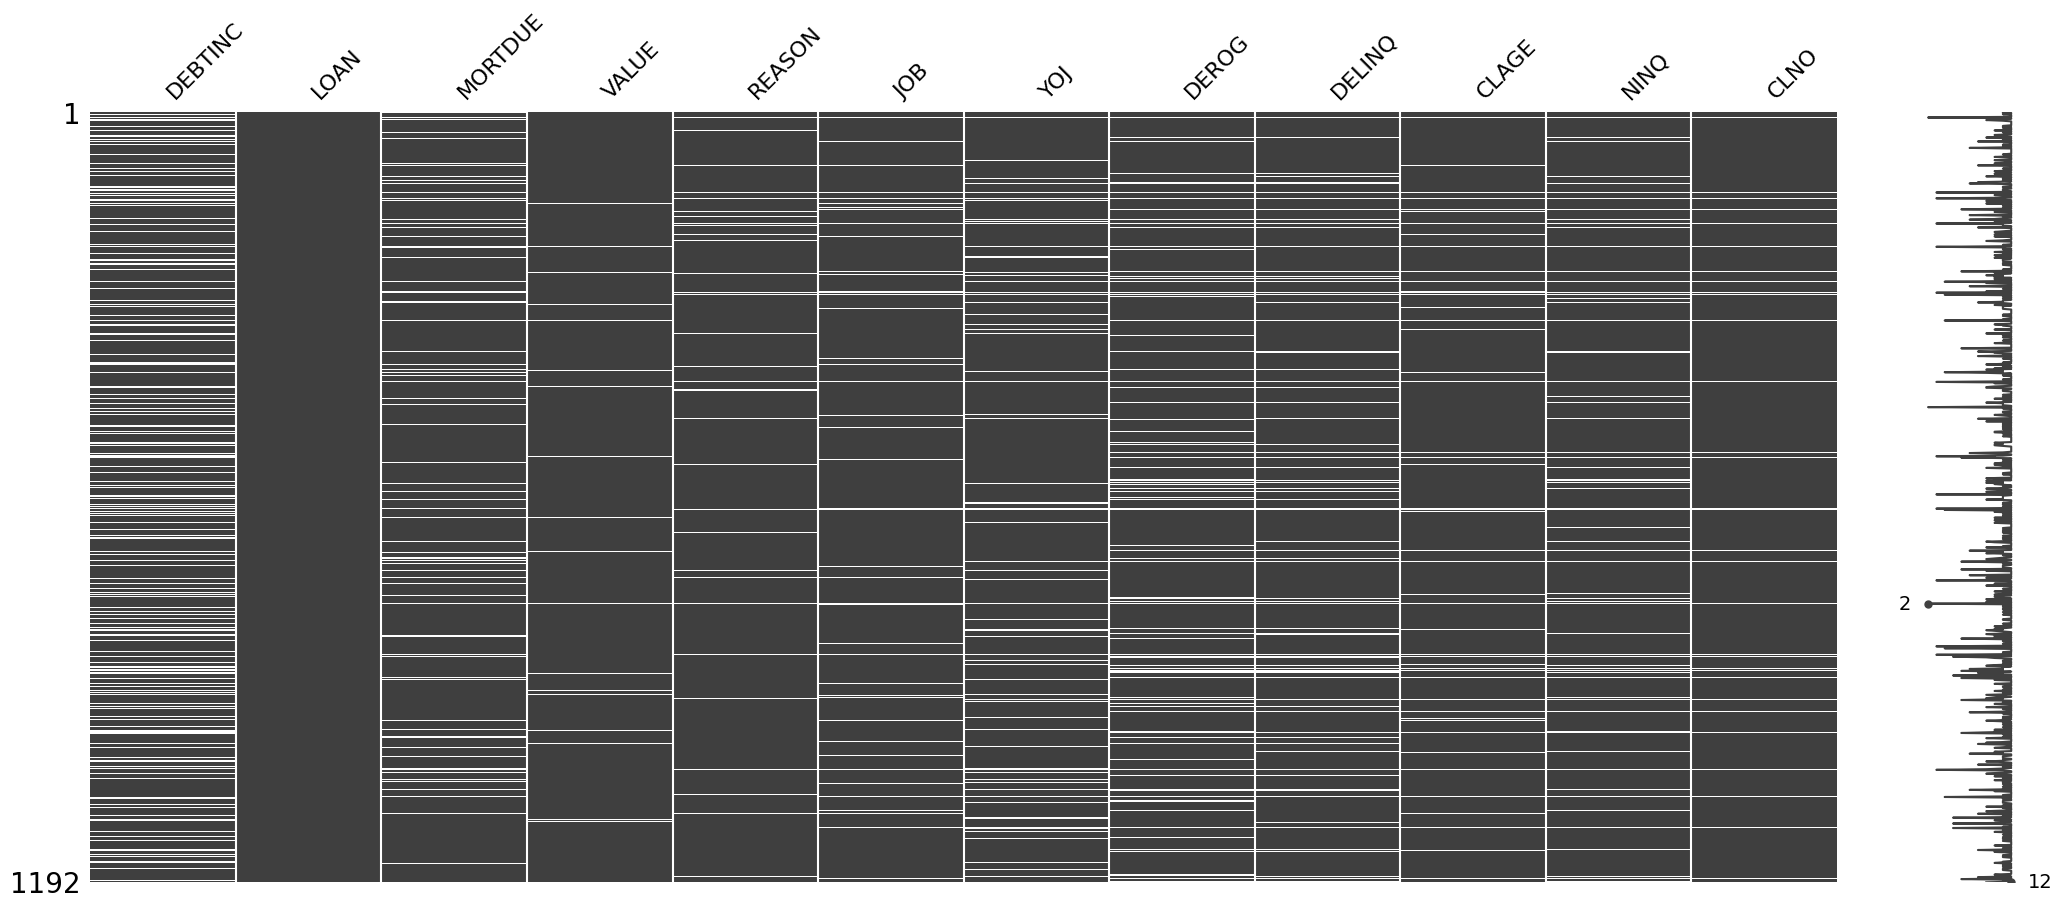

In [87]:
# Another way to observe missing values via matrix 
msno.matrix(df_u);

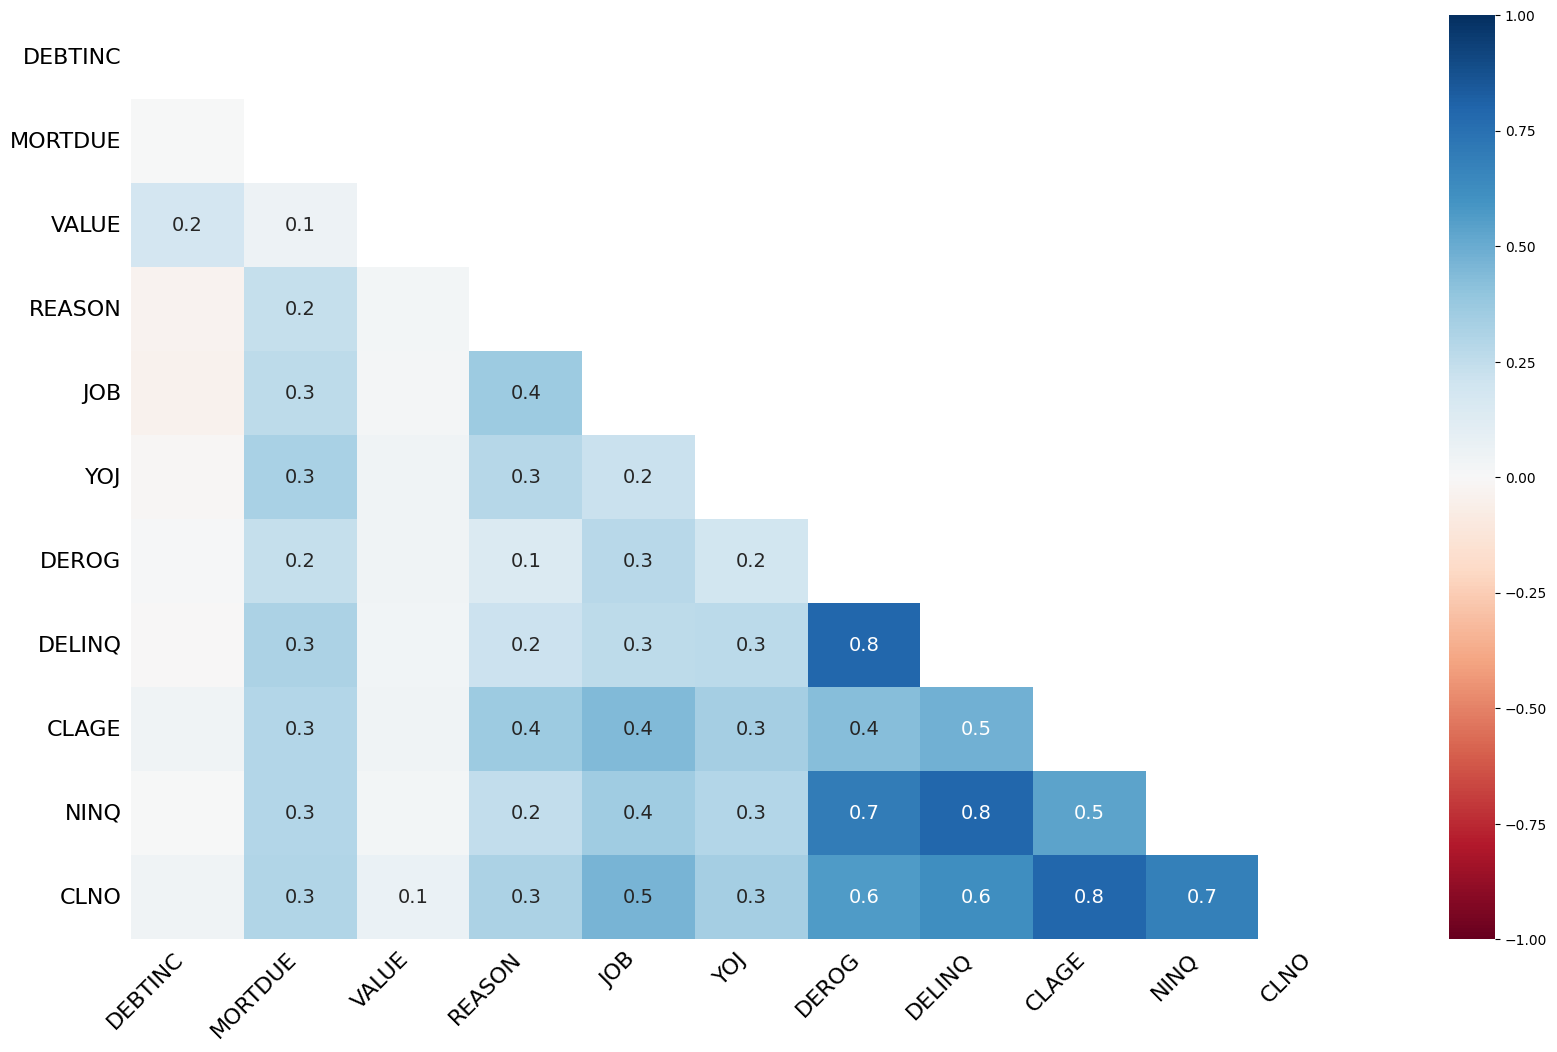

In [88]:
# Nullity Correlation
# Create a heatmap visualization of missing values
msno.heatmap(df_u);

Based on the Nullity Correlation heatmap above, there is a strong positive nullity relationship between DELINQ - DEROG, DELINQ - NINQ, and CLNO - CLAGE. This high nullity correlation between two variables indicates that when one variable is missing, the other variable is likely missing as well.

In [89]:
# Fill missing values categorical columns
df_u["JOB"] = df_u["JOB"].fillna("NA") # with 'NA'
df_u["REASON"] = df_u["REASON"].fillna(df_u["REASON"].mode()[0]) # with Mode

In [90]:
for category in df_u["JOB"].unique():
    # Fill continuous features with mean based on the category
    for feature in continuous_features_u:
        mean_value = df_u[df_u["JOB"] == category][feature].mean()
        df_u.loc[df_u["JOB"] == category, feature] = df_u.loc[df_u["JOB"] == category, feature].fillna(mean_value)

    # Fill discrete features with median based on the category
    for feature in discrete_features_u:
        median_value = df_u[df_u["JOB"] == category][feature].median()
        df_u.loc[df_u["JOB"] == category, feature] = df_u.loc[df_u["JOB"] == category, feature].fillna(median_value)


In [91]:
df_u.head()

,DEBTINC,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO
0,22.065764,25800,57622.514608,63456.0,DebtCon,Other,25.0,0.0,0.0,148.816285,0.0,8.0
1,20.380464,16400,62018.000000,91832.0,DebtCon,ProfExe,9.0,0.0,0.0,202.322500,0.0,19.0
2,29.476003,22400,18371.000000,38311.0,DebtCon,Other,1.0,0.0,0.0,37.235000,2.0,3.0
3,36.743949,33400,59000.000000,85000.0,HomeImp,Self,2.0,0.0,7.0,240.433333,3.0,26.0
4,29.045964,23000,71902.000000,101750.0,HomeImp,Other,5.0,0.0,0.0,214.389252,0.0,13.0


In [92]:
missing_data(df_u, 20)

         Missing Values  Missing Values Percentage  Unique Values
DEBTINC               0                        0.0            959
LOAN                  0                        0.0            357
MORTDUE               0                        0.0           1063
VALUE                 0                        0.0           1141
REASON                0                        0.0              2
JOB                   0                        0.0              7
YOJ                   0                        0.0             71
DEROG                 0                        0.0              8
DELINQ                0                        0.0             10
CLAGE                 0                        0.0           1106
NINQ                  0                        0.0             13
CLNO                  0                        0.0             58


### 3.1. Normalizing Continuous Numerical Variables That Are Not Normally Distributed
Since the numerical variables are skewed, we will perform the log normal distribution

In [93]:
continuous_features_u

['DEBTINC', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLAGE']

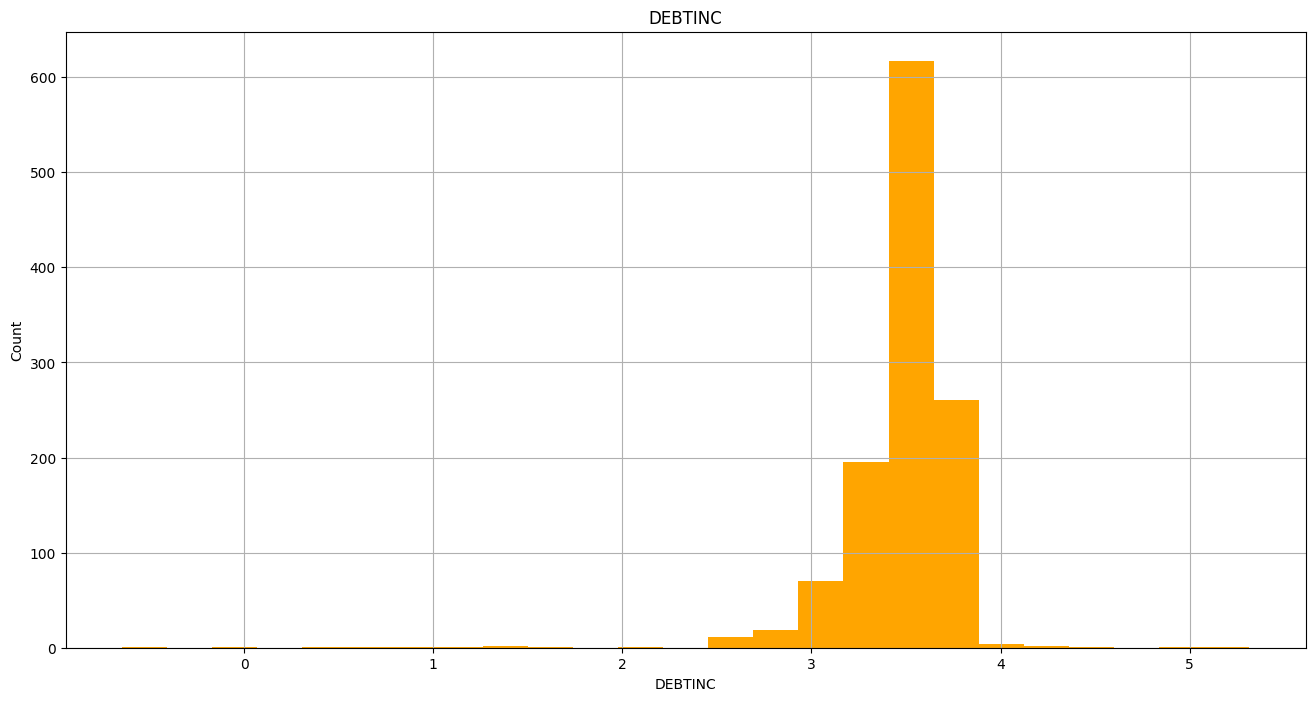

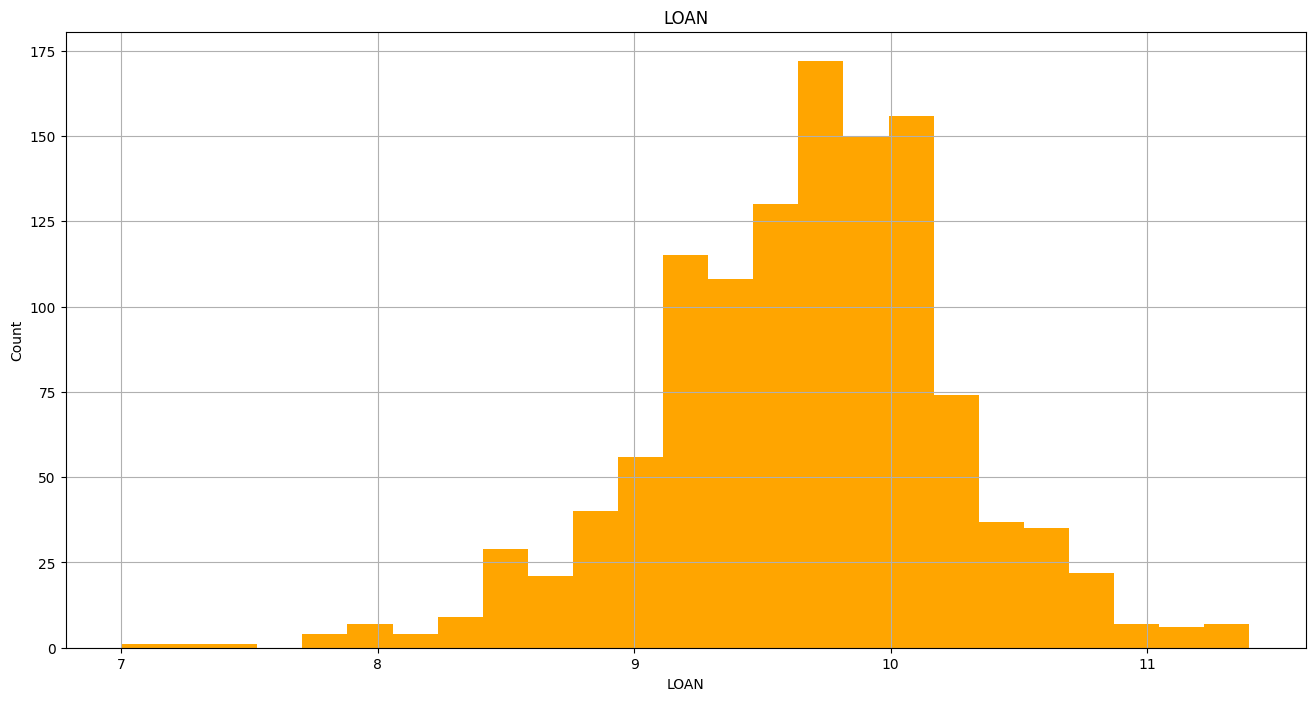

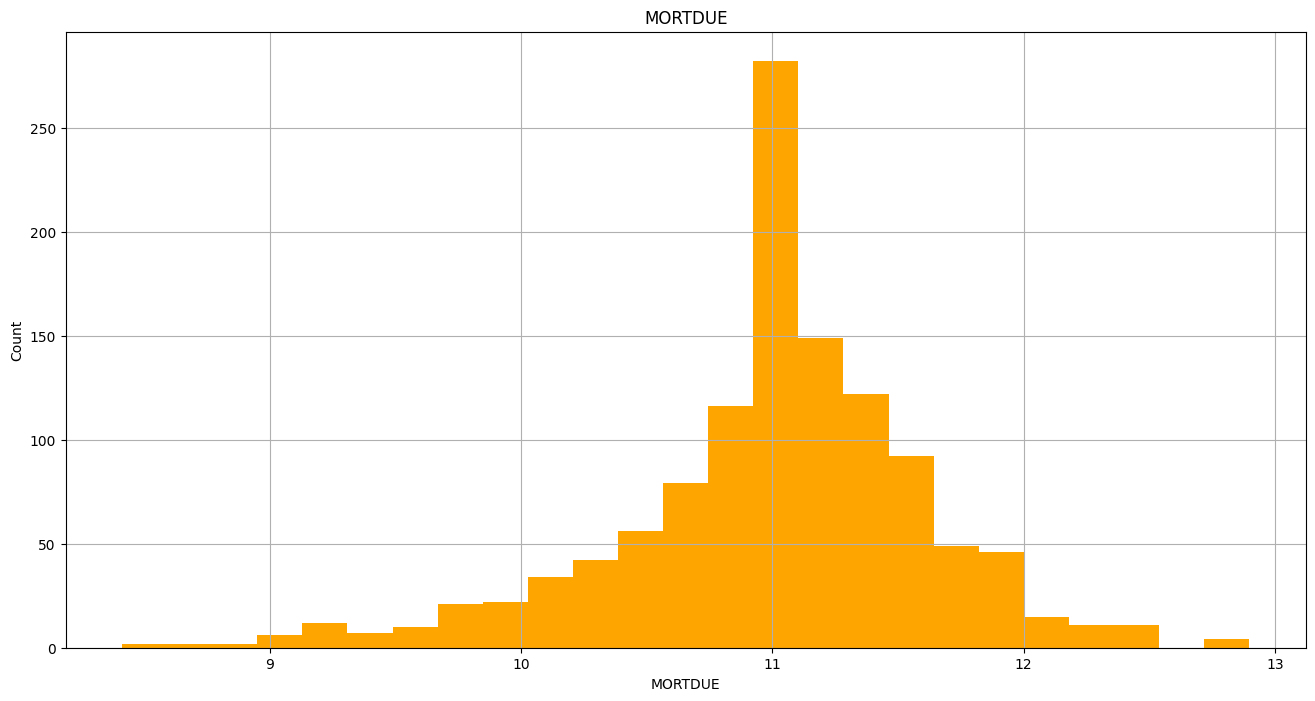

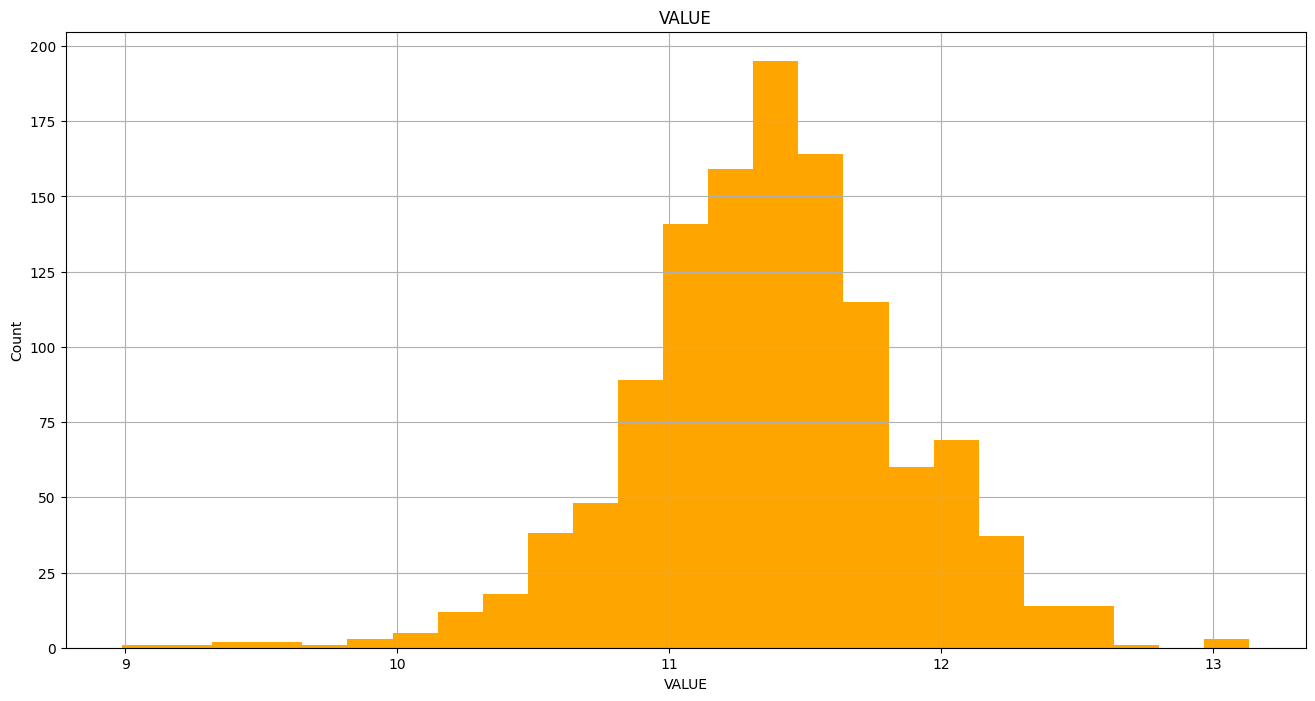

Skipped! Feature 'YOJ' contains zero.
Skipped! Feature 'CLAGE' contains zero.


In [94]:
# For each continuous feature, apply the natural logarithm transformation if the feature contains non-zero values

for feature in continuous_features_u:
    
    # Check if the feature contains zero
    if 0 in df_u[feature].unique():
        pass
        print("Skipped! Feature '{}' contains zero.".format(feature))
    else:
        # Apply the natural logarithm transformation
        df_u[feature] = np.log(df_u[feature])
        
        # Plot a histogram for the transformed feature with 25 bins
        df_u[feature].hist(bins=25, color="orange")
        
        # Set the labels for the x and y axes
        plt.xlabel(feature)
        plt.ylabel("Count")
        
        # Set the title of the plot
        plt.title(feature)
        
        # Display the histogram
        plt.show()

#### Scatter Plots

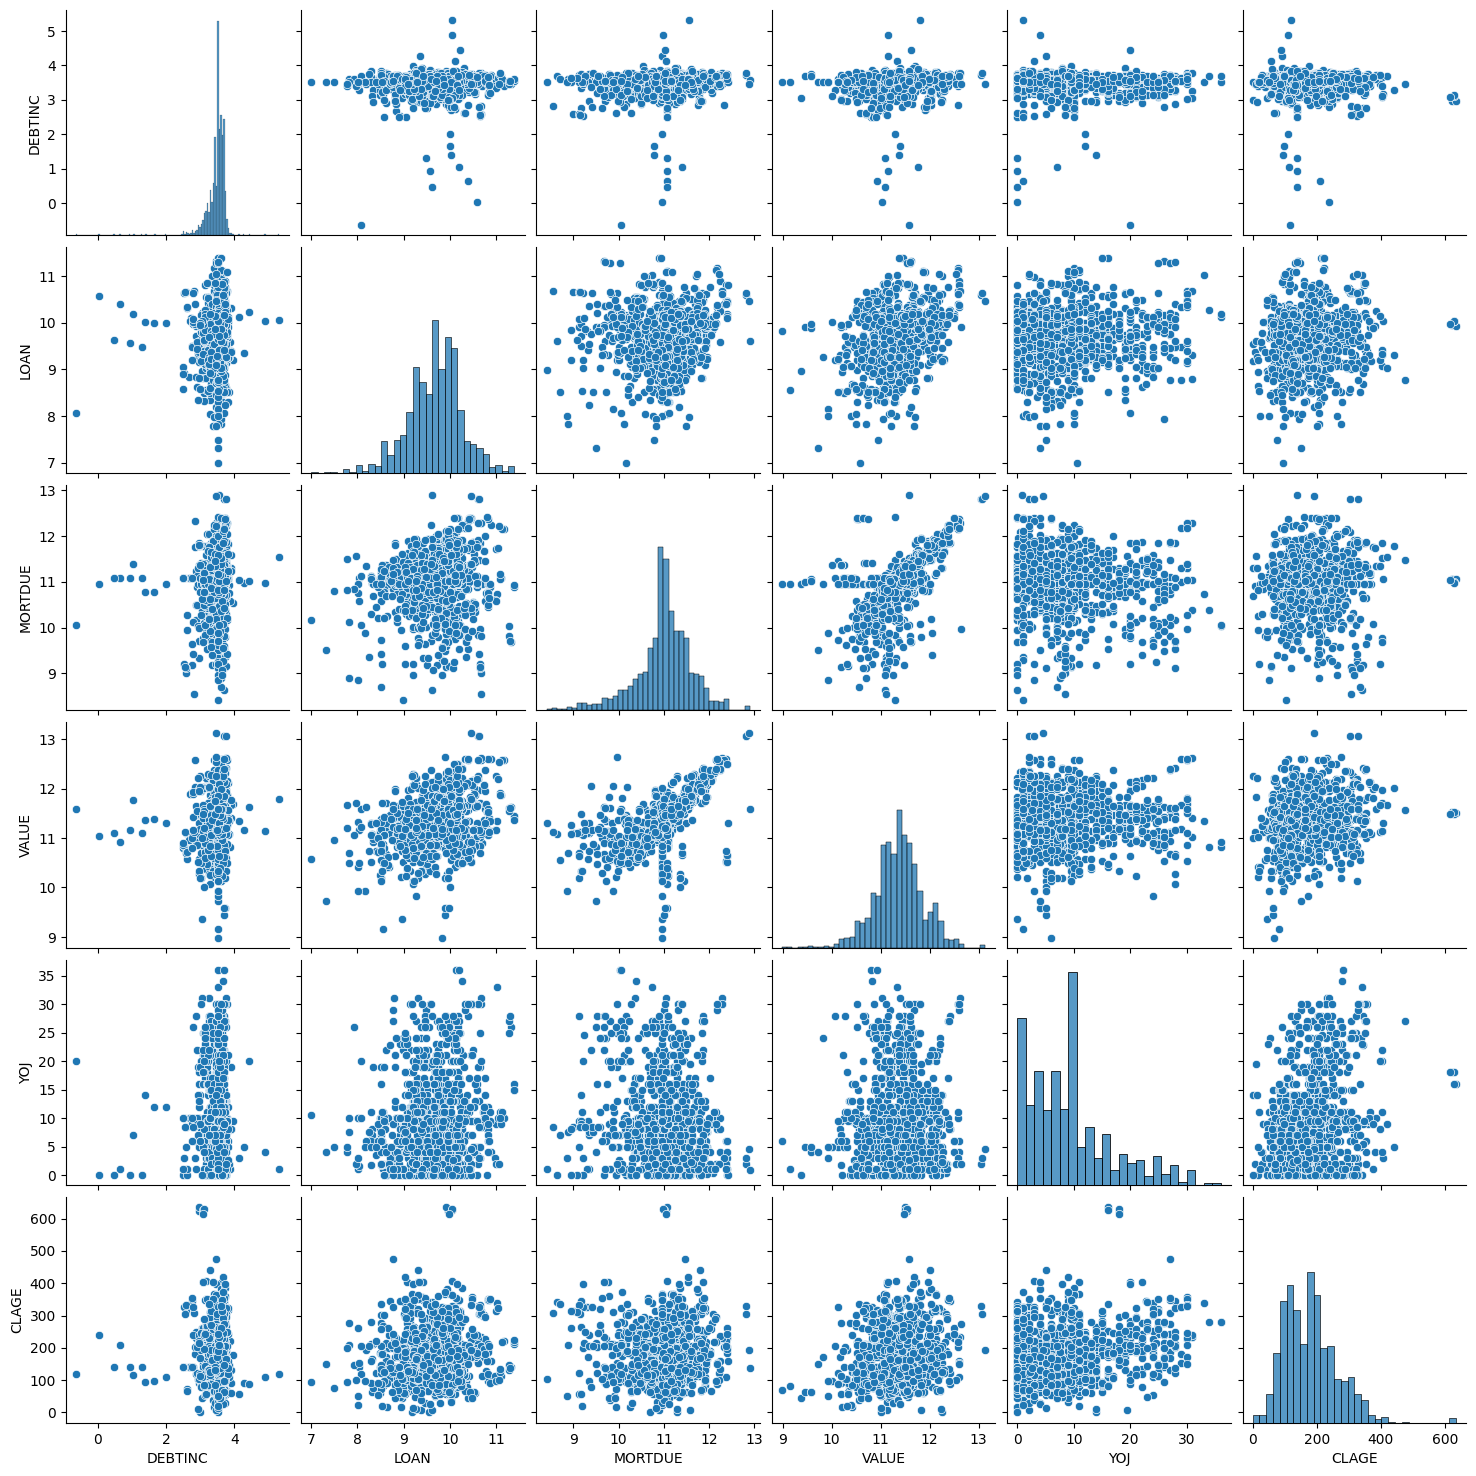

In [95]:
# Create a pair plot for continuous variables in the data set
sns.pairplot(df_u[continuous_features_u])

# Display the plot
plt.show()

### 4. Handling Outliers

In [96]:
# Print the number of numerical variables
print('Number of numerical variables: ', len(numerical_features_u))

Number of numerical variables:  10


In [97]:
numerical_features_u

['DEBTINC',
 'LOAN',
 'MORTDUE',
 'VALUE',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO']

Observe the outliers in the train dataset by drawing Box Plots:

DEBTINC
Skew : -4.87


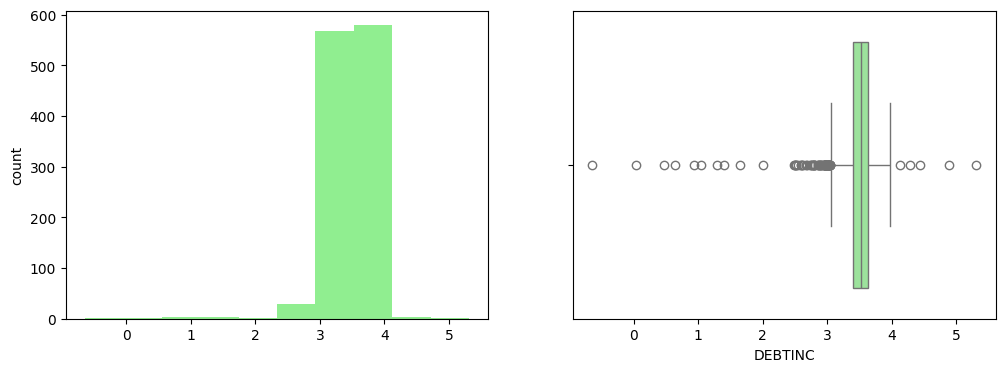

LOAN
Skew : -0.36


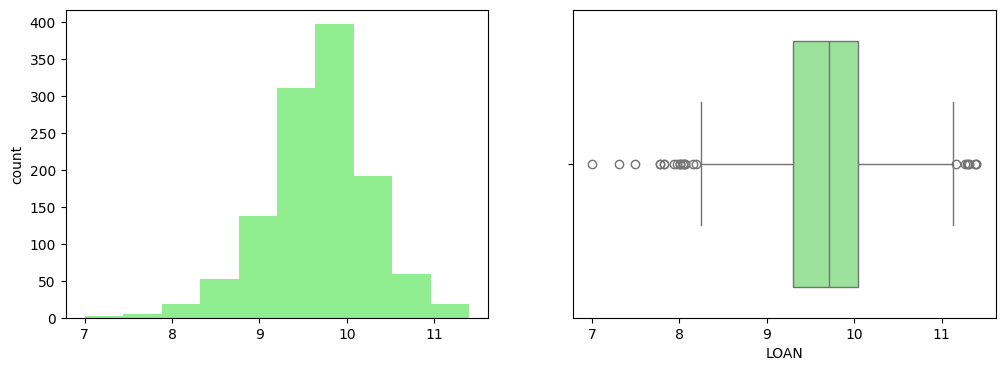

MORTDUE
Skew : -0.72


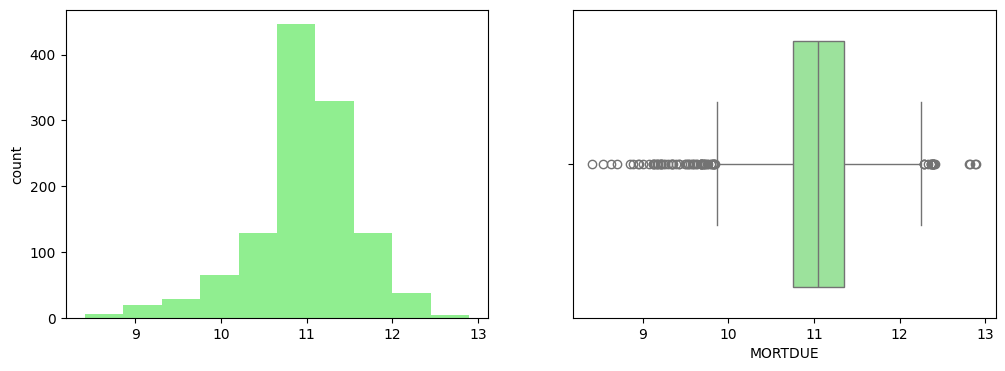

VALUE
Skew : -0.28


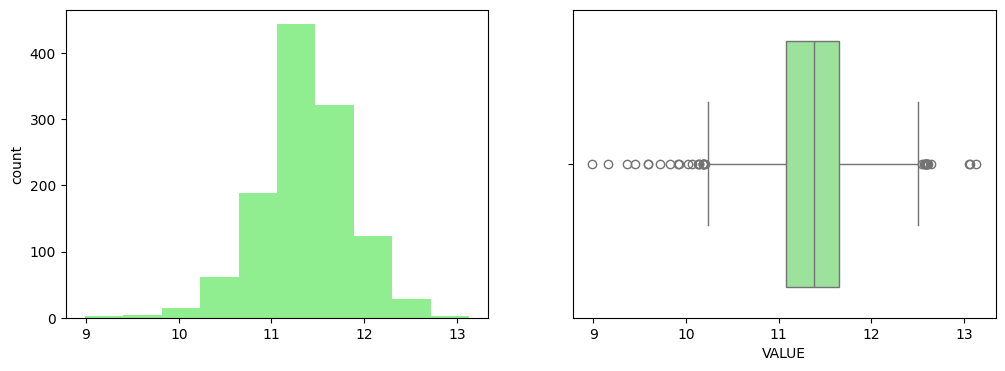

YOJ
Skew : 1.03


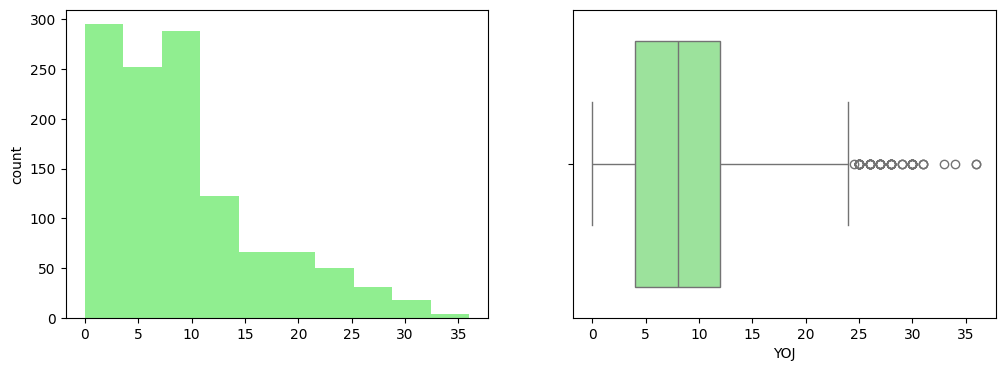

CLAGE
Skew : 1.01


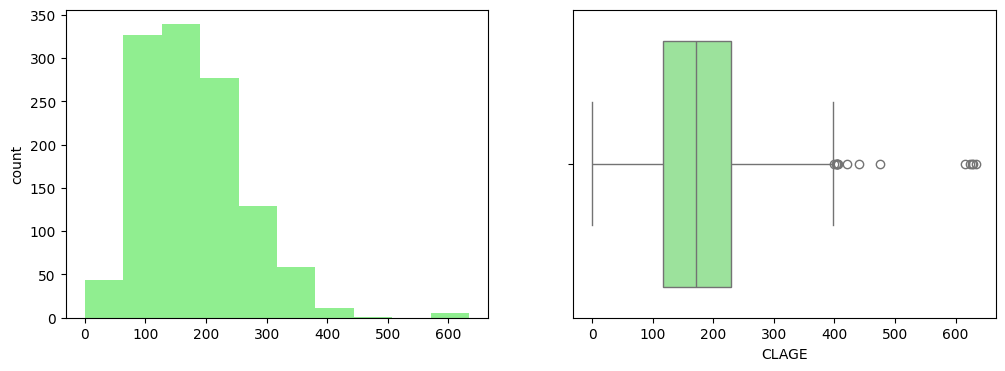

In [98]:
for col in continuous_features_u:
    print(col)
    
    print('Skew :',round(df_u[col].skew(), 2))
    
    plt.figure(figsize = (12, 4))
    
    plt.subplot(1, 2, 1)
    
    df_u[col].hist(bins = 10, grid = False, color='lightgreen')
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = df_u[col], color='lightgreen')
    
    plt.show()

Cap the outliers in the train dataset via min-max method:

In [99]:
# For each continuous numerical variable in the train dataset
for column in continuous_features_u:
    # Calculate the lower and upper limits (e.g., 5th and 95th percentiles)
    q1 = df_u[column].quantile(0.25)
    q3 = df_u[column].quantile(0.75)

    IQR = q3 - q1

    lower_limit = q1 - 1.5*IQR
    upper_limit = q3 + 1.5*IQR

    # Print(column, lower_limit, upper_limit)

    # Cap values below the lower limit to the lower limit
    df_u[column] = df_u[column].apply(lambda x: lower_limit if x < lower_limit else x)
    
    # Cap values above the upper limit to the upper limit
    df_u[column] = df_u[column].apply(lambda x: upper_limit if x > upper_limit else x)

# Show the results
df_u[continuous_features_u].head()

,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,CLAGE
0,3.094027,10.158130,10.961669,11.058102,24.0,148.816285
1,3.050219,9.705037,11.035180,11.427716,9.0,202.322500
2,3.383576,10.016816,9.847206,10.553492,1.0,37.235000
3,3.603974,10.416311,10.985293,11.350407,2.0,240.433333
4,3.368880,10.043249,11.183059,11.530274,5.0,214.389252


DEBTINC
Skew : -0.72


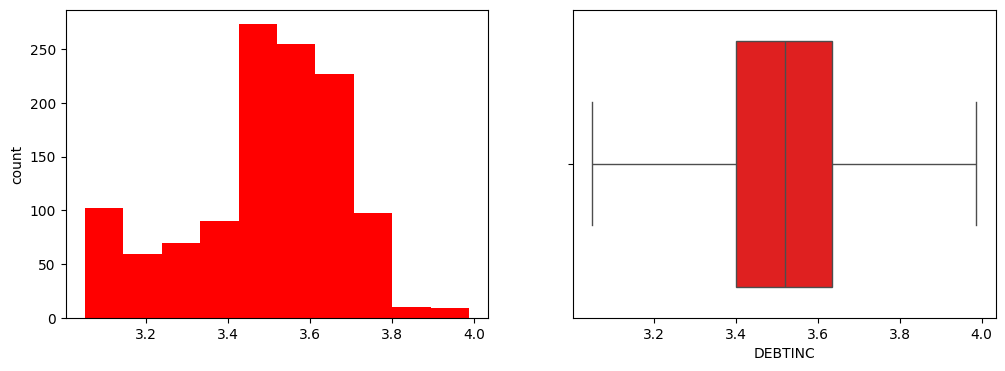

LOAN
Skew : -0.19


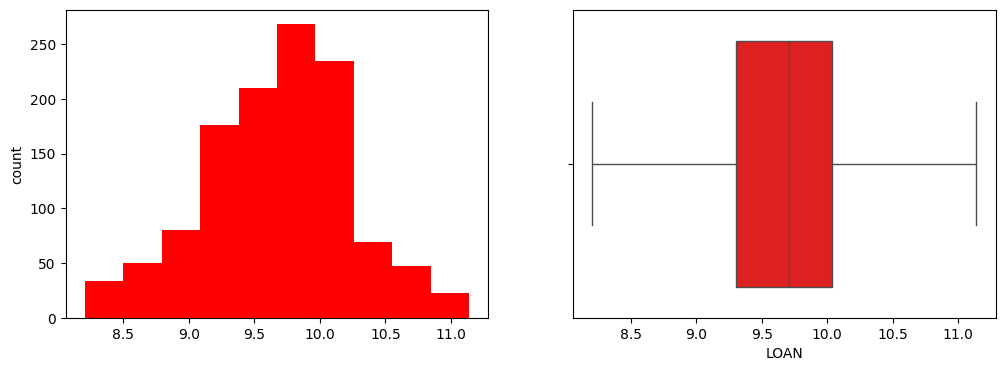

MORTDUE
Skew : -0.25


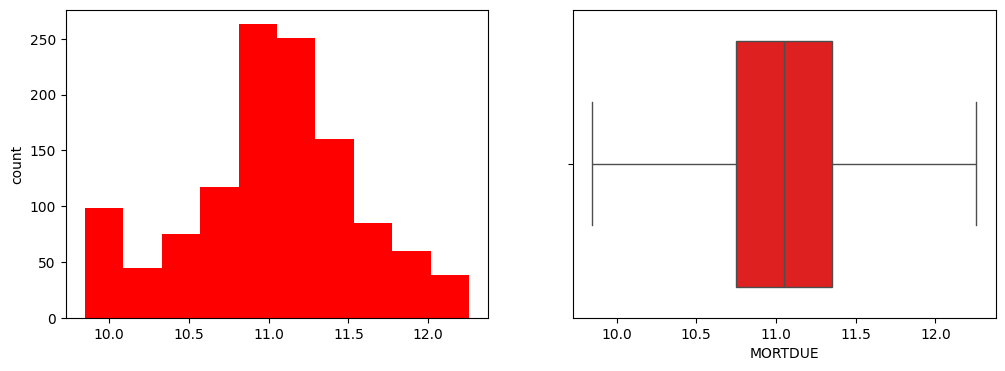

VALUE
Skew : -0.05


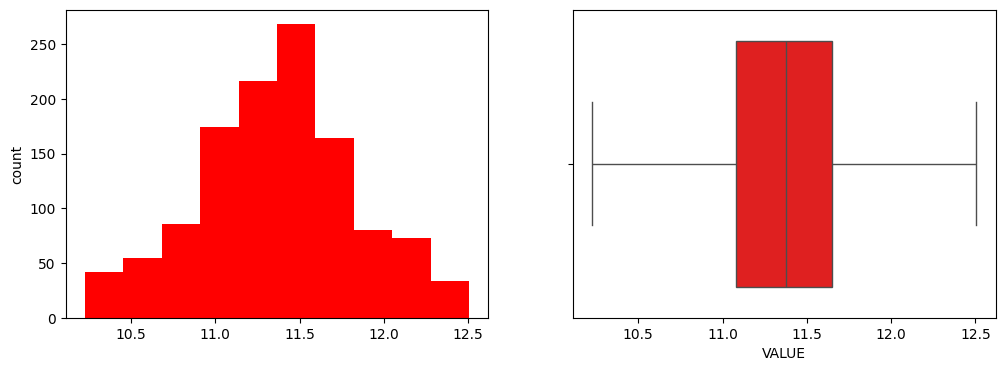

YOJ
Skew : 0.75


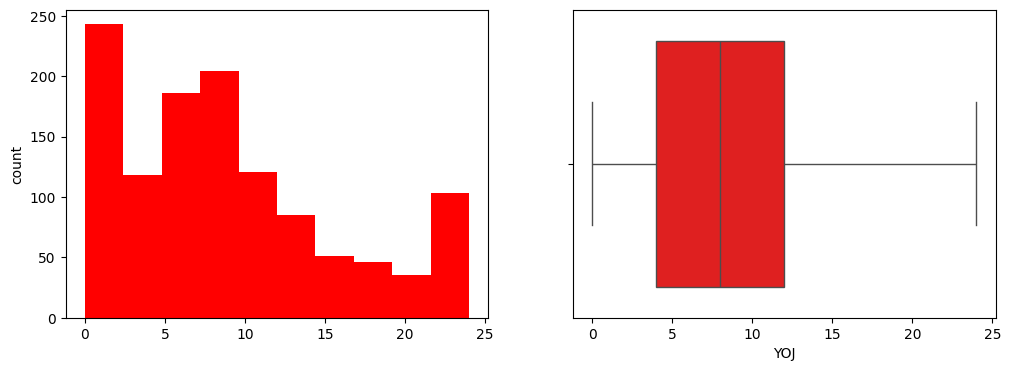

CLAGE
Skew : 0.52


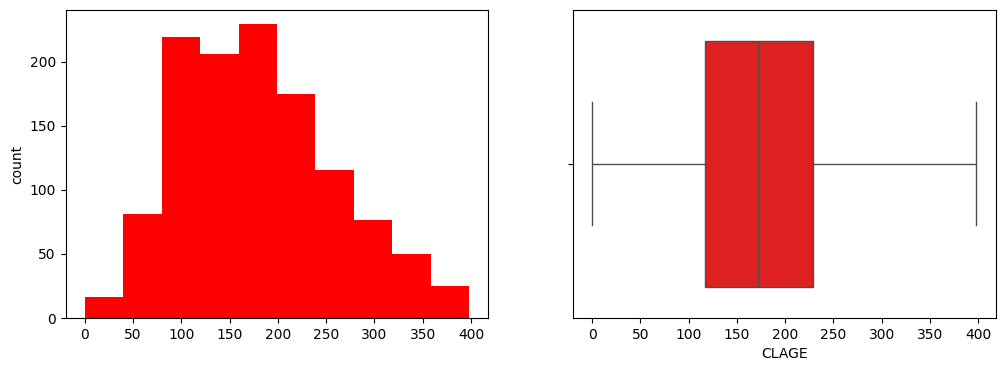

In [100]:
# Observe outliers after capping
for col in continuous_features_u:
    print(col)
    
    print('Skew :',round(df_u[col].skew(), 2))
    
    plt.figure(figsize = (12, 4))
    
    plt.subplot(1, 2, 1)
    
    df_u[col].hist(bins = 10, grid = False, color='red')
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = df_u[col], color='red')
    
    plt.show()

### 5. Encoding Categorical Variables

In [101]:
# Use len to get the number of categorical features
len(categorical_features_u)

2

In [102]:
df_u[categorical_features_u].head()

,REASON,JOB
0,DebtCon,Other
1,DebtCon,ProfExe
2,DebtCon,Other
3,HomeImp,Self
4,HomeImp,Other


One-Hot Encoding:

In [103]:
df_u = one_hot_encode_columns(df_u, ["REASON", "JOB"])

To prevent the dummy variable trap, one of the columns generated for every two categorical columns was deleted.

In [104]:
df_u = df_u.drop("REASON_HomeImp", axis=1)
df_u = df_u.drop("JOB_NA", axis=1)

In [105]:
df_u.head()

,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,REASON_DebtCon,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,3,10,10,11,24,0,0,148,0,8,1,0,0,1,0,0,0
1,3,9,11,11,9,0,0,202,0,19,1,0,0,0,1,0,0
2,3,10,9,10,1,0,0,37,2,3,1,0,0,1,0,0,0
3,3,10,10,11,2,0,7,240,3,26,0,0,0,0,0,0,1
4,3,10,11,11,5,0,0,214,0,13,0,0,0,1,0,0,0


In [106]:
# Print the shape of the dataset, which represents the number of rows and columns
print(df_u.shape)

# Observe that 5 new columns have been added

(1192, 17)


### 6. Exploring Distribution Situations (Skewness & Kurtosis)

In [107]:
continuous_features_u

['DEBTINC', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLAGE']

In [108]:
# DEBTINC column outputs nan values. 
# Therefore, Skewness and Kurtosis will not be applied.

continuous_features_u.remove("DEBTINC")

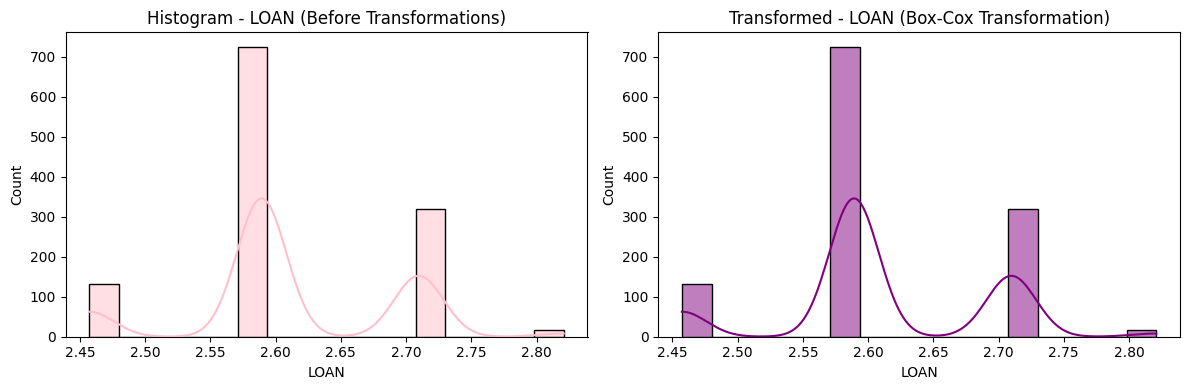

LOAN: Skewness (Before): 0.1658206145622172, Kurtosis (Before): 0.06464679903581771
LOAN: Skewness (After): -0.005553633909401936, Kurtosis (After): 0.055828603316944836


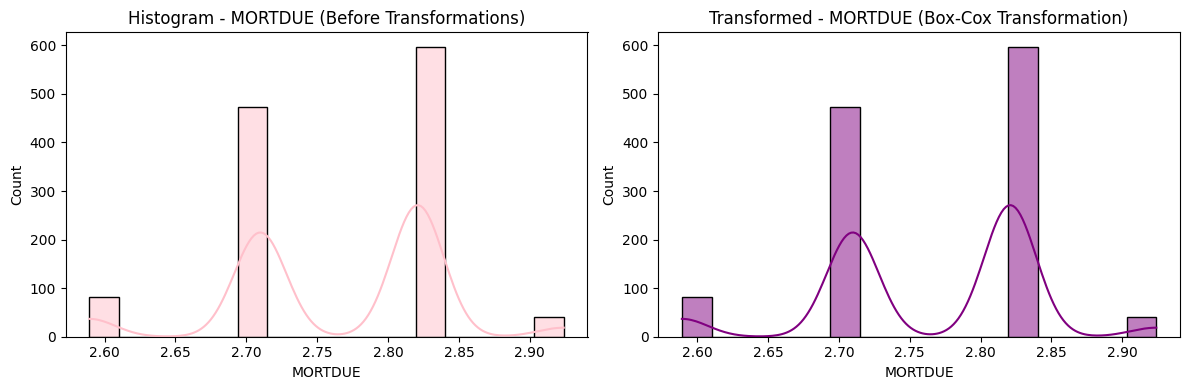

MORTDUE: Skewness (Before): -0.33443718896605806, Kurtosis (Before): -0.2191928619373522
MORTDUE: Skewness (After): -0.4678498601077884, Kurtosis (After): -0.11632552425202825


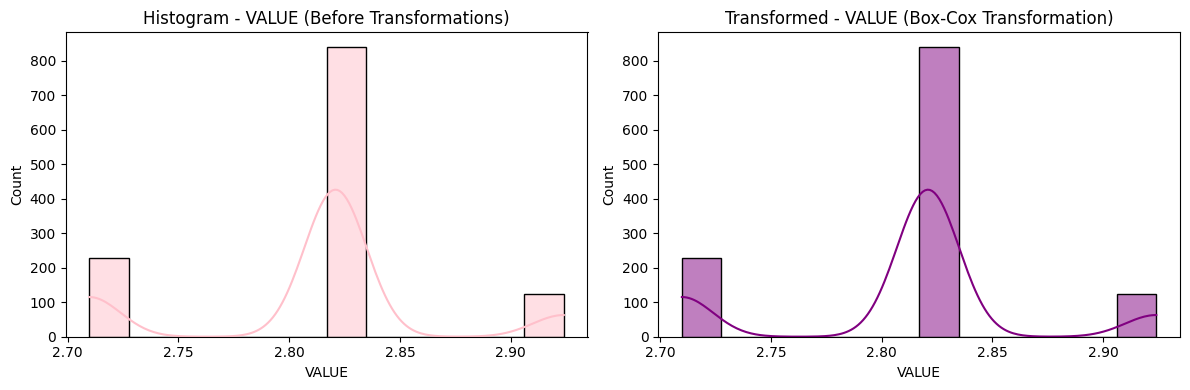

VALUE: Skewness (Before): -0.07392933386204434, Kurtosis (Before): 0.3705407017538307
VALUE: Skewness (After): -0.2136671608086372, Kurtosis (After): 0.2879509425361704


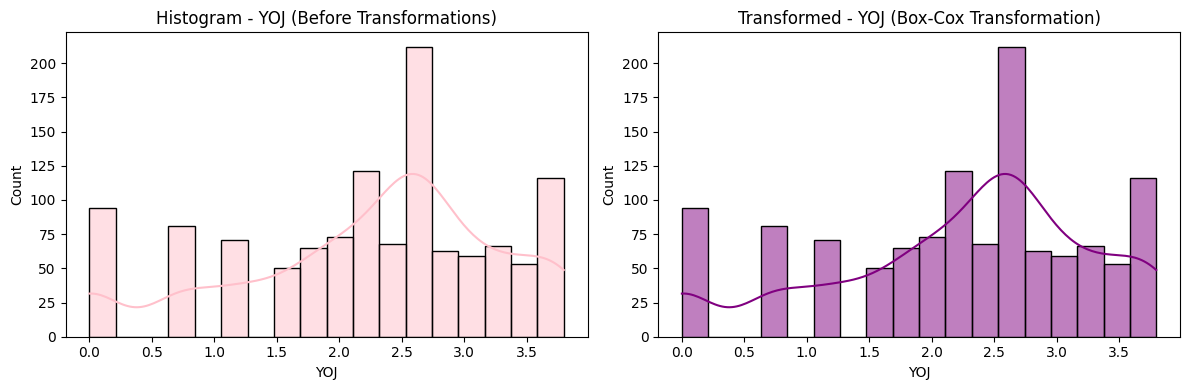

YOJ: Skewness (Before): 0.7601140467323535, Kurtosis (Before): -0.25656504405979375
YOJ: Skewness (After): -0.5733527297155224, Kurtosis (After): -0.39948084409821494


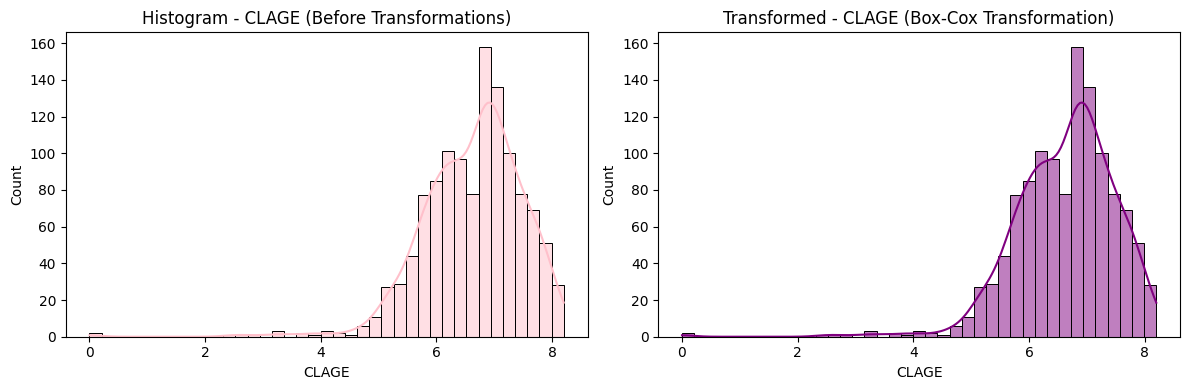

CLAGE: Skewness (Before): 0.5249633716764736, Kurtosis (Before): -0.19280032070784792
CLAGE: Skewness (After): -1.3556878114325148, Kurtosis (After): 6.443578513608351


In [109]:
# Iterate throug_trainh each continuous feature in the DataFrame
for column in df_u[continuous_features_u]:
        # Calculate skewness and _trainkurtosis before applying the transformation
        skewness_before = skew(df_u[column])
        kurt_before = kurtosis(df_u[column])

        # Apply Box-Cox Transformation with a _trainlambda parameter of 0.1
        df_u[column] = boxcox1p(df_u[column], 0.1)

        # Calculate skewness and kurtosis after applying the transformation
        skewness_after = skew(df_u[column])
        kurt_after = kurtosis(df_u[column])

        # Visualization: Create a side-by-side histogram comparison before and after transformation
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

        # Plot the hist_trainogram of the original data
        sns.histplot(df_u[column], ax=axes[0], kde=True, color='pink')
        axes[0].set_title(f'Histogram - {column} (Before Transformations)')

        # Plot the histogram of the transformed data
        sns.histplot(df_u[column], ax=axes[1], kde=True, color='purple')
        axes[1].set_title(f'Transformed - {column} (Box-Cox Transformation)')

        # Adjust layout for better visualization
        plt.tight_layout()
        plt.show()

        # Print skewness and kurtosis information before and after transformation
        print(f"{column}: Skewness (Before): {skewness_before}, Kurtosis (Before): {kurt_before}")
        print(f"{column}: Skewness (After): {skewness_after}, Kurtosis (After): {kurt_after}")

In [110]:
# Selecting numerical features from the DataFrame df_u
numerical_features_u = [feature for feature in df_u.columns if df_u[feature].dtypes != 'O']

# Counting the number of numerical features
num_numerical_features_u = len(numerical_features_u)

# Printing the number of numerical features
print("Number of numerical features: ", num_numerical_features_u)

Number of numerical features:  17


In [111]:
df_u.head()

,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,REASON_DebtCon,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,3,2.709816,2.709816,2.820889,3.797297,0,0,6.493720,0,8,1,0,0,1,0,0,0
1,3,2.589254,2.820889,2.820889,2.589254,0,0,7.011774,0,19,1,0,0,0,1,0,0
2,3,2.709816,2.589254,2.709816,0.717735,0,0,4.387269,2,3,1,0,0,1,0,0,0
3,3,2.709816,2.709816,2.820889,1.161232,0,7,7.306199,3,26,0,0,0,0,0,0,1
4,3,2.709816,2.820889,2.820889,1.962312,0,0,7.109757,0,13,0,0,0,1,0,0,0


# Classification Algorithms (ML)

In [112]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [114]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# import optuna

# # K-Fold cross-validation için StratifiedKFold
# cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# # Classification Modelleri:
# classifiers = {
#     'RandomForest': RandomForestClassifier(),
#     'GradientBoosting': GradientBoostingClassifier(),
#     'DecisionTree': DecisionTreeClassifier(),
#     'KNeighbors': KNeighborsClassifier(),
#     'XGBoost': XGBClassifier(),
# }

# # Optuna ile en iyi parametreleri ve en iyi modeli bulma
# best_params = {}
# best_accuracy = 0.0
# best_model_name = ""

# def objective(trial, classifier_name, X_train, y_train):
#     params = {}
    
#     if classifier_name == 'RandomForest':
#         params = {
#             'n_estimators': trial.suggest_int('n_estimators', 300, 4000),
#             'max_depth': trial.suggest_int('max_depth', 1, 10),
#             'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
#             'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
#             'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
#             'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
#             'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy'])
#         }
#     elif classifier_name == 'GradientBoosting':
#         params = {
#             'n_estimators': trial.suggest_int('n_estimators', 300, 4000),
#             'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
#             'max_depth': trial.suggest_int('max_depth', 1, 10),
#             'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
#             'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
#             'subsample': trial.suggest_float('subsample', 0.1, 1.0),
#             'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2'])
#         }
#     elif classifier_name == 'DecisionTree':
#         params = {
#             'max_depth': trial.suggest_int('max_depth', 1, 10),
#             'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
#             'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
#             'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
#             'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy'])
#         }
#     elif classifier_name == 'KNeighbors':
#         params = {
#             'n_neighbors': trial.suggest_int('n_neighbors', 1, 10),
#             'p': trial.suggest_int('p', 1, 2),
#             'weights': trial.suggest_categorical('weights', ['uniform', 'distance'])
#         }
#     elif classifier_name == 'XGBoost':
#         params = {
#             'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
#             'n_estimators': trial.suggest_int('n_estimators', 300, 4000),
#             'max_depth': trial.suggest_int('max_depth', 1, 10),
#             'subsample': trial.suggest_float('subsample', 0.1, 1.0),
#             'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
#             'gamma': trial.suggest_float('gamma', 0.01, 1.0),
#             'min_child_weight': trial.suggest_int('min_child_weight', 1, 10)
#         }

#     model = classifiers[classifier_name].set_params(**params)

#     scores = cross_val_predict(model, X_train, y_train, cv=cv, method='predict_proba')
#     y_pred = scores.argmax(axis=1)
    
#     accuracy = accuracy_score(y_train, y_pred)
    
#     global best_accuracy, best_params, best_model_name
#     if accuracy > best_accuracy:
#         best_accuracy = accuracy
#         best_params[classifier_name] = params
#         best_model_name = classifier_name

#     return accuracy

# # Her bir model için en iyi parametreleri bulma
# for classifier_name in classifiers.keys():
#     study = optuna.create_study(direction='maximize')
#     study.optimize(lambda trial: objective(trial, classifier_name, X_train, y_train), n_trials=50)

# # En iyi parametreleri yazdırma ve Confusion Matrix'i inceleme
# best_model = classifiers[best_model_name].set_params(**best_params[best_model_name])
    
# scores = cross_val_predict(best_model, X_train, y_train, cv=cv, method='predict_proba')
# y_pred = scores.argmax(axis=1)
    
# accuracy = accuracy_score(y_train, y_pred)
# precision = precision_score(y_train, y_pred)
# recall = recall_score(y_train, y_pred)
# f1 = f1_score(y_train, y_pred)
# cm = confusion_matrix(y_train, y_pred)
    
# print(f"{best_model_name} - Best Parameters:")
# print(best_params[best_model_name])
# print(f"Final {best_model_name} Results:")
# print(f"  Accuracy: {accuracy:.4f}")
# print(f"  Precision: {precision:.4f}")
# print(f"  Recall: {recall:.4f}")
# print(f"  F1 Score: {f1:.4f}")
# print("  Confusion Matrix:")
# print(cm)
# print("\n")


GradientBoosting - Best Parameters:
{'n_estimators': 1944, 'learning_rate': 0.0754661764119145, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 4, 'subsample': 0.6717246988236207, 'max_features': 'sqrt'}


Final GradientBoosting Results:

  Accuracy: 0.9288

  Precision: 0.9635

  Recall: 0.6693

  F1 Score: 0.7899

  Confusion Matrix:

[[2983   19]

 [ 248  502]]

In [115]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model on training data
    model.fit(X_train, y_train)
    
    # Make predictions on training data
    y_train_pred = model.predict(X_train)
    
    # Make predictions on test data
    y_test_pred = model.predict(X_test)
    
    # Calculate training and test accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Calculate Precision and Recall values
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    # print(f"Precision: {precision:.4f}")
    # print(f"Recall: {recall:.4f}")
    
    # Evaluate the model for overfitting
    if train_accuracy - test_accuracy > 0.045:
        print("The model shows signs of overfitting.")
    else:
        print("The model does not show signs of overfitting.")

# Classifier models
classifiers = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
}

# Evaluate training and test performance for each model
for classifier_name, model in classifiers.items():
    print(f"Evaluation for {classifier_name} Model:")
    evaluate_model(model, X_train, y_train, X_test, y_test)
    print("\n" + "*"*50 + "\n")


Evaluation for RandomForest Model:
Train Accuracy: 0.9997
Test Accuracy: 0.9083
The model shows signs of overfitting.

**************************************************

Evaluation for GradientBoosting Model:
Train Accuracy: 0.8897
Test Accuracy: 0.8603
The model does not show signs of overfitting.

**************************************************

Evaluation for DecisionTree Model:
Train Accuracy: 0.9997
Test Accuracy: 0.8785
The model shows signs of overfitting.

**************************************************

Evaluation for KNeighbors Model:
Train Accuracy: 0.9033
Test Accuracy: 0.8667
The model does not show signs of overfitting.

**************************************************

Evaluation for XGBoost Model:
Train Accuracy: 0.9845
Test Accuracy: 0.9126
The model shows signs of overfitting.

**************************************************



After the overfit evaluation, it was seen that the GradientBoosting Model and KNeighbors Model were not overfit. Therefore, these models were examined.

# GradientBoosting

## Training the GradientBoosting model on the Training set

In [116]:
# Gerekli kütüphaneleri içe aktarın
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Gradient Boosting Classifier modelini oluşturun ve parametreleri belirleyin
classifier_gb = GradientBoostingClassifier(n_estimators=1944,
                                   learning_rate=0.0754661764119145,
                                   max_depth=10,
                                   min_samples_split=7,
                                   min_samples_leaf=4,
                                   subsample=0.6717246988236207,
                                   max_features='sqrt')

# modeli eğitin
classifier_gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.0754661764119145, max_depth=10,
                           max_features='sqrt', min_samples_leaf=4,
                           min_samples_split=7, n_estimators=1944,
                           subsample=0.6717246988236207)

In [117]:
# Use the trained SVM classifier to predict labels for the test data
y_pred_gb = classifier_gb.predict(X_test)

## Making the Confusion Matrix

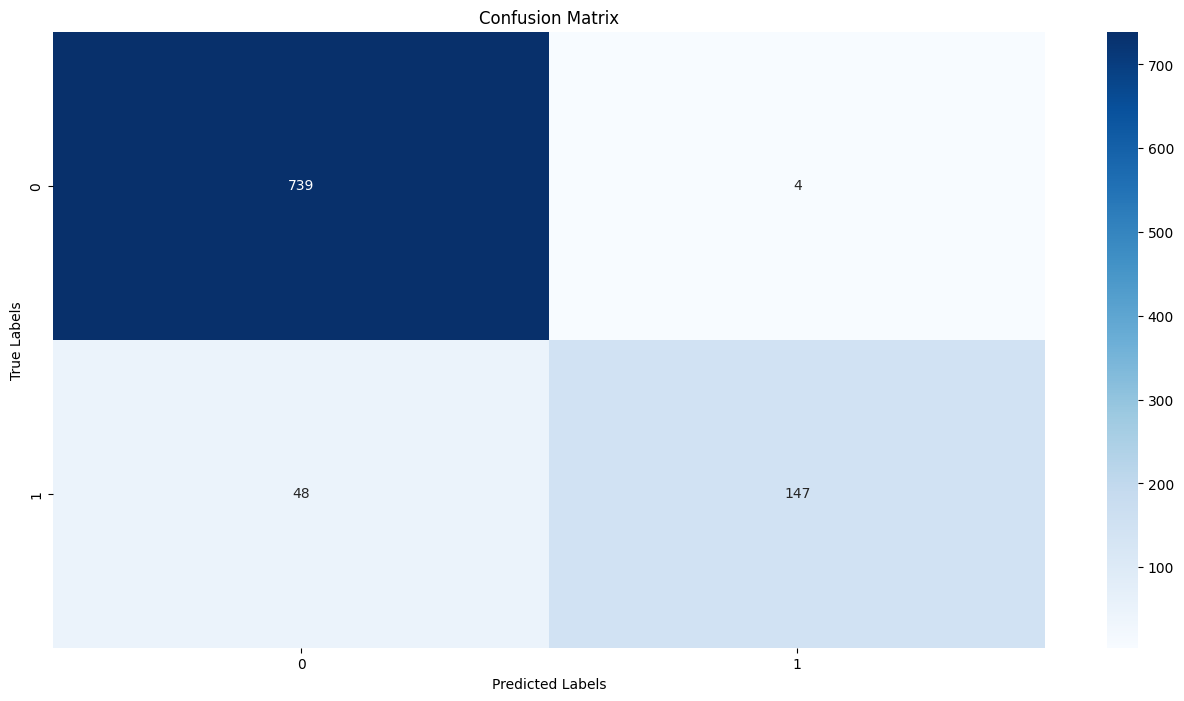

In [118]:
# Import necessary modules
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues")

# Set axis labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Display the plot
plt.show()

In [119]:
# Import the precision_score and recall_score functions from the scikit-learn library
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall scores of the model
# y_test contains the true labels, and y_pred_gb contains the predicted labels
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)

# Print the precision and recall scores
print("Precision:", precision_gb)
print("Recall:", recall_gb)

Precision: 0.9735099337748344
Recall: 0.7538461538461538


- In this case, it can be stated that 97.35% of the model's positive predictions are indeed positive. The model's positive predictions are generally accurate.
- In this case, 75.38% of the actual positives are correctly identified by the model. The model may have missed some of the positive instances.

In [120]:
# Import the f1_score function from the scikit-learn library
from sklearn.metrics import f1_score

# Calculate the F1 score of the model
# y_test contains the true labels, and y_pred_gb contains the predicted labels
f1_gb = f1_score(y_test, y_pred_gb)

# Print the F1 score
print("F1 Score:", f1_gb)

F1 Score: 0.8497109826589596


- With a calculated value of 0.8497, it indicates that the model balances both precision and recall well.

In conclusion, when considering these metrics together, it can be said that the model generally performs well. However, there is room for improvement, especially in terms of recall, where the model might need to focus on reducing false negatives.

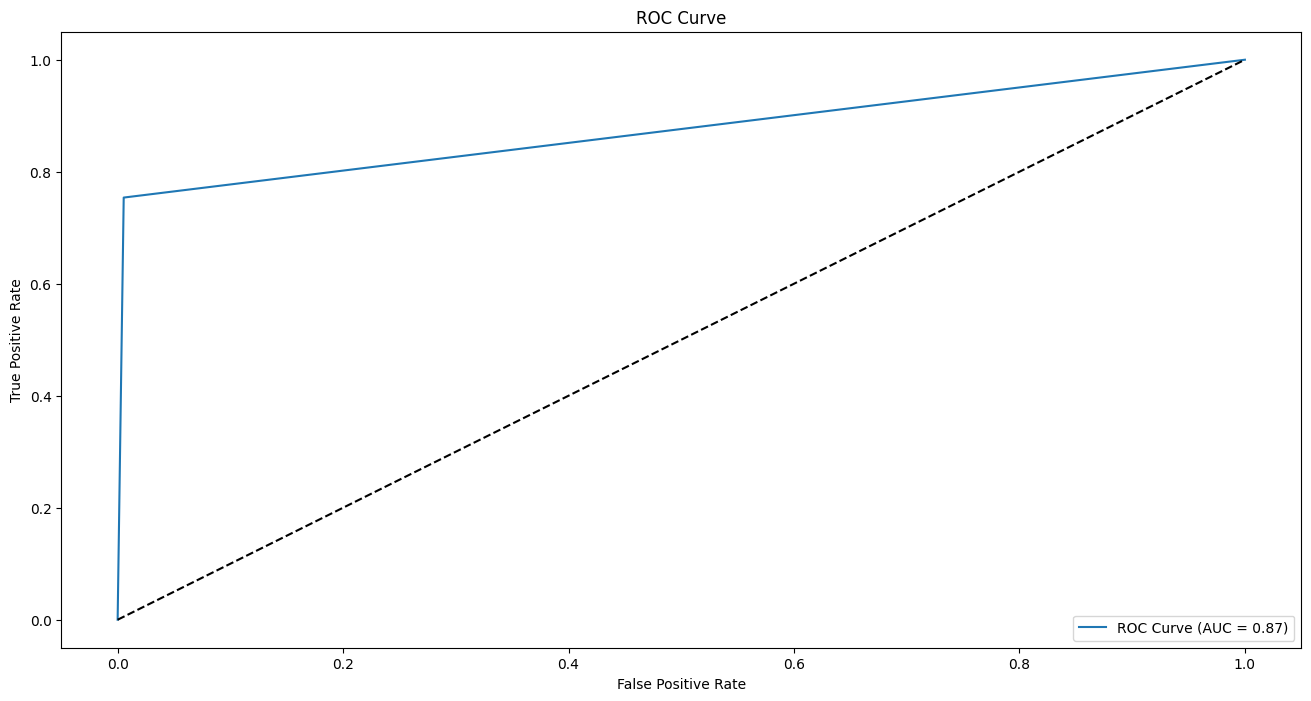

In [121]:
# Import necessary libraries for ROC curve and AUC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute the ROC curve and AUC score
# y_test contains the true labels, and y_pred_gb contains the predicted labels
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb)
auc = roc_auc_score(y_test, y_pred_gb)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random predictions
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Unseen Data for GradientBoosting

In [122]:
unseen_dataset = df_u.iloc[:, :].values
unseen_dataset

array([[3.        , 2.70981615, 2.70981615, ..., 0.        , 0.        ,
        0.        ],
       [3.        , 2.58925412, 2.82088854, ..., 1.        , 0.        ,
        0.        ],
       [3.        , 2.70981615, 2.58925412, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [3.        , 2.4573094 , 2.82088854, ..., 0.        , 0.        ,
        0.        ],
       [3.        , 2.70981615, 2.82088854, ..., 1.        , 0.        ,
        0.        ],
       [3.        , 2.58925412, 2.82088854, ..., 1.        , 0.        ,
        0.        ]])

In [123]:
y_pred_unseen_gb = classifier_gb.predict(unseen_dataset)
y_pred_unseen_gb

array([0, 0, 0, ..., 0, 0, 0])

In [124]:
y_pred_unseen_df_gb = pd.DataFrame(y_pred_unseen_gb, columns=["BAD"])
y_pred_unseen_df_gb.head(10)

,BAD
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,0
9,0


In [125]:
all_df_gb = df_u.merge(y_pred_unseen_df_gb, how="left", left_index=True, right_index=True)
all_df_gb.head()

,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,REASON_DebtCon,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,BAD
0,3,2.709816,2.709816,2.820889,3.797297,0,0,6.493720,0,8,1,0,0,1,0,0,0,0
1,3,2.589254,2.820889,2.820889,2.589254,0,0,7.011774,0,19,1,0,0,0,1,0,0,0
2,3,2.709816,2.589254,2.709816,0.717735,0,0,4.387269,2,3,1,0,0,1,0,0,0,0
3,3,2.709816,2.709816,2.820889,1.161232,0,7,7.306199,3,26,0,0,0,0,0,0,1,1
4,3,2.709816,2.820889,2.820889,1.962312,0,0,7.109757,0,13,0,0,0,1,0,0,0,0


# K-Nearest Neighbors (K-NN)

## Feature Scaling

In [126]:
# Import the StandardScaler class from the scikit-learn library
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
sc = StandardScaler()

# Fit the scaler to the training data and transform it
# This scales and centers the features in X_train
X_train = sc.fit_transform(X_train)

# Transform the test data using the same scaler
# This ensures consistency in scaling between training and testing sets
X_test = sc.transform(X_test)

## Training the K-NN model on the Training set

In [127]:
# Import the KNeighborsClassifier from scikit-learn
from sklearn.neighbors import KNeighborsClassifier

# Create a KNeighborsClassifier with specified parameterss
# Euclidean distance
classifier_knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean', p=1, weights='uniform')

# Fit the classifier to the training data
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1, p=1)

## Predicting the Test set results

In [128]:
# Predictions from the KNN classifier
y_pred_knn = classifier_knn.predict(X_test)

## Making the Confusion Matrix

In [129]:
from sklearn.metrics import accuracy_score

# Evaluate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

KNN Accuracy: 0.9168443496801706


In [130]:
# Import the confusion_matrix function from the scikit-learn library
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix to evaluate the performance of the classifier
# y_test contains the true labels, and y_pred contains the predicted labels
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm_knn)

Confusion Matrix:
[[734   9]
 [ 69 126]]


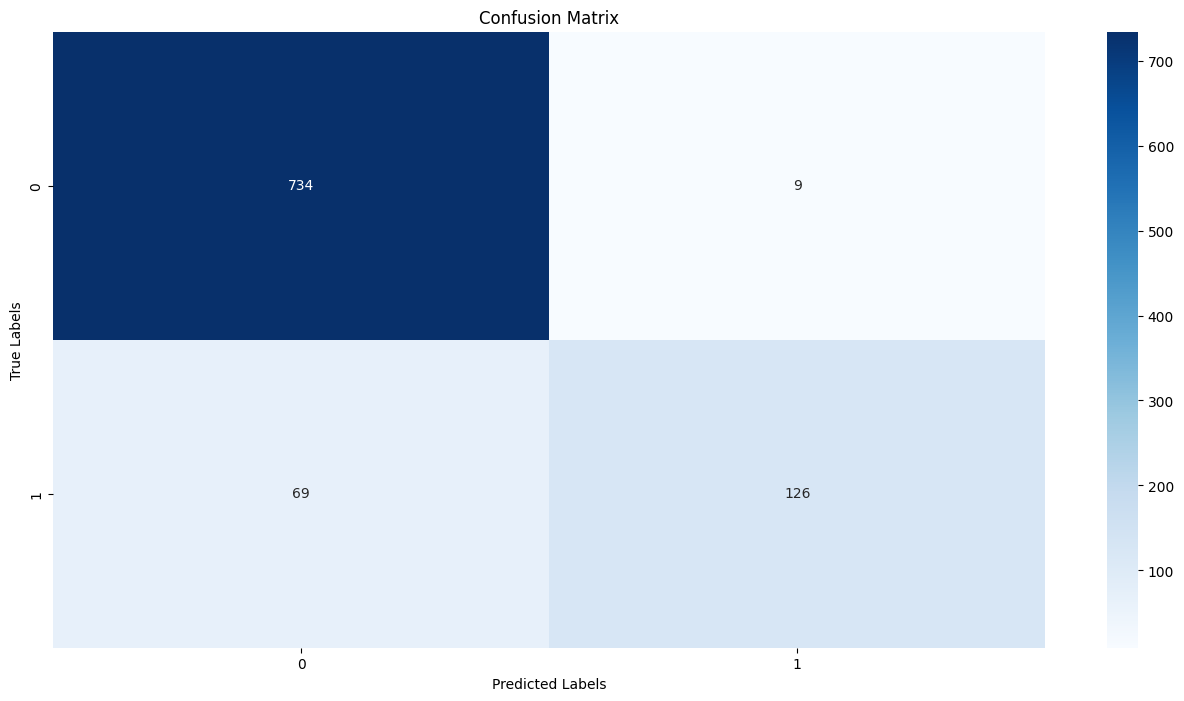

In [131]:
# Import the necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Use Seaborn to create a heatmap of the confusion matrix
# annot=True adds the numerical values in each cell, fmt="d" formats them as integers
# cmap="Blues" sets the color map to shades of blue
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues")

# Set the title, xlabel, and ylabel for the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Display the plot
plt.show()

In [132]:
# Import the accuracy_score function from the scikit-learn library
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model by comparing predicted and actual labels
# y_test contains the true labels, and y_pred_knn contains the predicted labels
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Print the accuracy of the model
print("Accuracy:", accuracy_knn)

Accuracy: 0.9168443496801706


In [133]:
# Import the precision_score and recall_score functions from the scikit-learn library
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall scores of the model
# y_test contains the true labels, and y_pred_knn contains the predicted labels
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)

# Print the precision and recall scores
print("Precision:", precision_knn)
print("Recall:", recall_knn)

Precision: 0.9333333333333333
Recall: 0.6461538461538462


In [134]:
# Import the f1_score function from the scikit-learn library
from sklearn.metrics import f1_score

# Calculate the F1 score of the model
# y_test contains the true labels, and y_pred_knn contains the predicted labels
f1_knn = f1_score(y_test, y_pred_knn)

# Print the F1 score
print("F1 Score:", f1_knn)

F1 Score: 0.7636363636363636


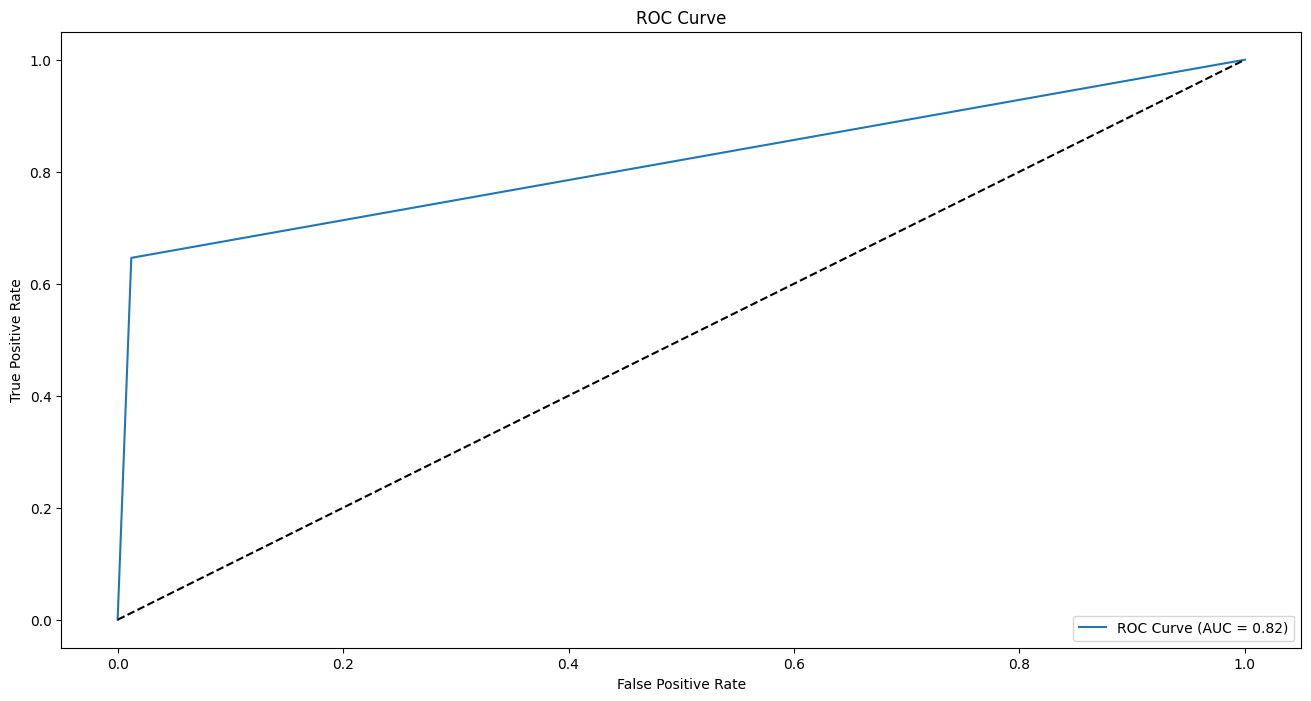

In [135]:
# Import necessary libraries for ROC curve and AUC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute the ROC curve and AUC score
# y_test contains the true labels, and y_pred_knn contains the predicted labels
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
auc = roc_auc_score(y_test, y_pred_knn)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random predictions
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Unseen Data for KNN

In [136]:
unseen_dataset = df_u.iloc[:, :].values
unseen_dataset

array([[3.        , 2.70981615, 2.70981615, ..., 0.        , 0.        ,
        0.        ],
       [3.        , 2.58925412, 2.82088854, ..., 1.        , 0.        ,
        0.        ],
       [3.        , 2.70981615, 2.58925412, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [3.        , 2.4573094 , 2.82088854, ..., 0.        , 0.        ,
        0.        ],
       [3.        , 2.70981615, 2.82088854, ..., 1.        , 0.        ,
        0.        ],
       [3.        , 2.58925412, 2.82088854, ..., 1.        , 0.        ,
        0.        ]])

In [137]:
unseen_dataset_knn = sc.transform(unseen_dataset)

In [138]:
y_pred_unseen_knn = classifier_knn.predict(unseen_dataset_knn)
y_pred_unseen_knn

array([0, 0, 0, ..., 0, 0, 0])

In [139]:
y_pred_unseen_df_knn = pd.DataFrame(y_pred_unseen_knn, columns=["BAD"])
y_pred_unseen_df_knn.head(10)

,BAD
0,0
1,0
2,0
3,1
4,1
5,0
6,0
7,0
8,0
9,0


In [140]:
all_df_knn = df_u.merge(y_pred_unseen_df_knn, how="left", left_index=True, right_index=True)
all_df_knn.head()

,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,REASON_DebtCon,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,BAD
0,3,2.709816,2.709816,2.820889,3.797297,0,0,6.493720,0,8,1,0,0,1,0,0,0,0
1,3,2.589254,2.820889,2.820889,2.589254,0,0,7.011774,0,19,1,0,0,0,1,0,0,0
2,3,2.709816,2.589254,2.709816,0.717735,0,0,4.387269,2,3,1,0,0,1,0,0,0,0
3,3,2.709816,2.709816,2.820889,1.161232,0,7,7.306199,3,26,0,0,0,0,0,0,1,1
4,3,2.709816,2.820889,2.820889,1.962312,0,0,7.109757,0,13,0,0,0,1,0,0,0,1


# Precision Recall Curve

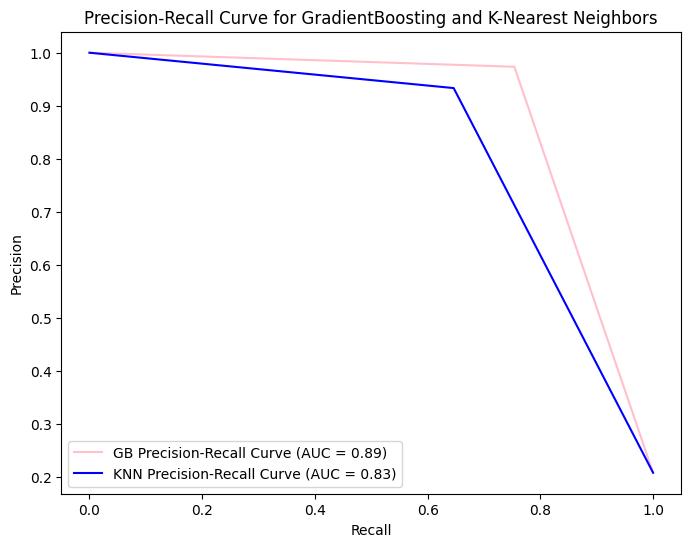

In [141]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# y_pred_gb and y_pred_knn are the predicted probabilities for classes
precision_gb, recall_gb, _ = precision_recall_curve(y_test, y_pred_gb)
auc_score_gb = auc(recall_gb, precision_gb)

precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_pred_knn)
auc_score_knn = auc(recall_knn, precision_knn)

plt.figure(figsize=(8, 6))

# Plotting Precision-Recall Curve for Gradient Boosting
plt.plot(recall_gb, precision_gb, label=f'GB Precision-Recall Curve (AUC = {auc_score_gb:.2f})', color='pink')

# Plotting Precision-Recall Curve for K-Nearest Neighbors
plt.plot(recall_knn, precision_knn, label=f'KNN Precision-Recall Curve (AUC = {auc_score_knn:.2f})', color='blue')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for GradientBoosting and K-Nearest Neighbors')
plt.legend(loc='best')
plt.show()


Considering the F1 Score and Precision-Recall Curve, GradientBoosting Classifier was chosen as the best algorithm for this data set.

In [142]:
# y_pred_unseen_df = pd.DataFrame(y_pred_unseen, columns=["BAD"])
# submission=pd.read_csv("sample_submission.csv")
# result = pd.concat([submission['index'], y_pred_unseen_df], axis=1)

# result.to_csv('submission.csv', index=False)
# result.head()